# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [3]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option('display.max_columns', None)
# Sets the limit for the number of displayed rows
pd.set_option('display.max_rows', 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# ignore warnings and silence ConvergenceWarning from statsmodels during model fitting
import warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# to remove the number of columns displayed
pd.set_option('display.max_columns', None)
# Setting the limit on number of rows displayed
pd.set_option('display.max_rows', 200)
# set the precision of floating numbers to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#  Load the data
hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv')

In [7]:
# copy of the dataset
hotel_bookings_df = hotel_df.copy()

## Data Overview

- Observations
- Sanity checks

In [8]:
# view the first few rows of data
hotel_bookings_df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [9]:
# view the last few rows of data
hotel_bookings_df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [10]:
# view the shape of the data
print(f'There are {hotel_bookings_df.shape[0]} rows and {hotel_bookings_df.shape[1]} columns in the data.')

There are 36275 rows and 19 columns in the data.


In [11]:
# view the data types of the data
hotel_bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [12]:
# check for the duplicated values
hotel_bookings_df.duplicated().sum()

np.int64(0)

In [13]:
# drop the Booking_ID column,as it's not a predictive feature.
hotel_bookings_df.drop('Booking_ID', axis=1, inplace=True)


In [14]:
# view statistical Summary of the data
hotel_bookings_df.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

#####Observations:

 - There are 36275 rows and 19 columns in the data.
 - The columns Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object data type, while the remaining features are numerical.
 - There are no null values in the dataset.
 - There are no duplicate values in the data.
 - The number of adults ranges from 0 to 4.
 - The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
 - The distribution of weeknight and weekend stays appears reasonable, though a stay including 7 weekend nights may be considered unusually long.
 - A minimum of 75% of customers do not request parking space.
 - The mean lead time is 85 days. However, the large disparity between the 75th percentile and the maximum indicates possible outliers in the data.
 - The dataset has booking records from both 2017 and 2018.
 - A minimum of 75% of customers are not repeating customers.
 - The average room rate is €103. However, the large gap between the 75th percentile and the maximum value suggests potential outliers in the pricing data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(10, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={'height_ratios': (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, palette= 'viridis'
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        )  # annotate the percentage
    # Set x-axis labels to horizontal
    plt.xticks(rotation=45)
    plt.show()  # show the plot

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
    )

    plt.tight_layout()
    plt.show()

###Observations on lead time

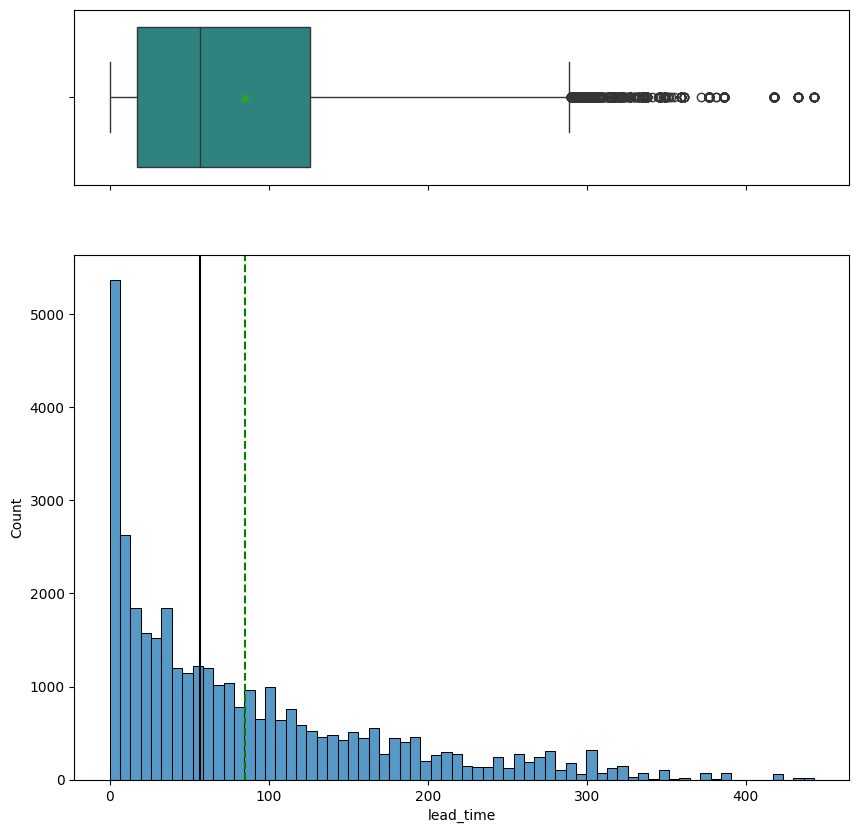

In [19]:
histogram_boxplot(hotel_bookings_df, 'lead_time')

 ***Observations:***

 - A significant portion of bookings were made on the day of arrival (lead time = 0), indicating strong same-day demand.
 - Lead time shows a right-skewed distribution, with many outliers.
 - We observe the notable portion of bookings were made in advance between 100 and 500 days,suggesting a segment of long-term planners among the clients.


### Observations on average price per room

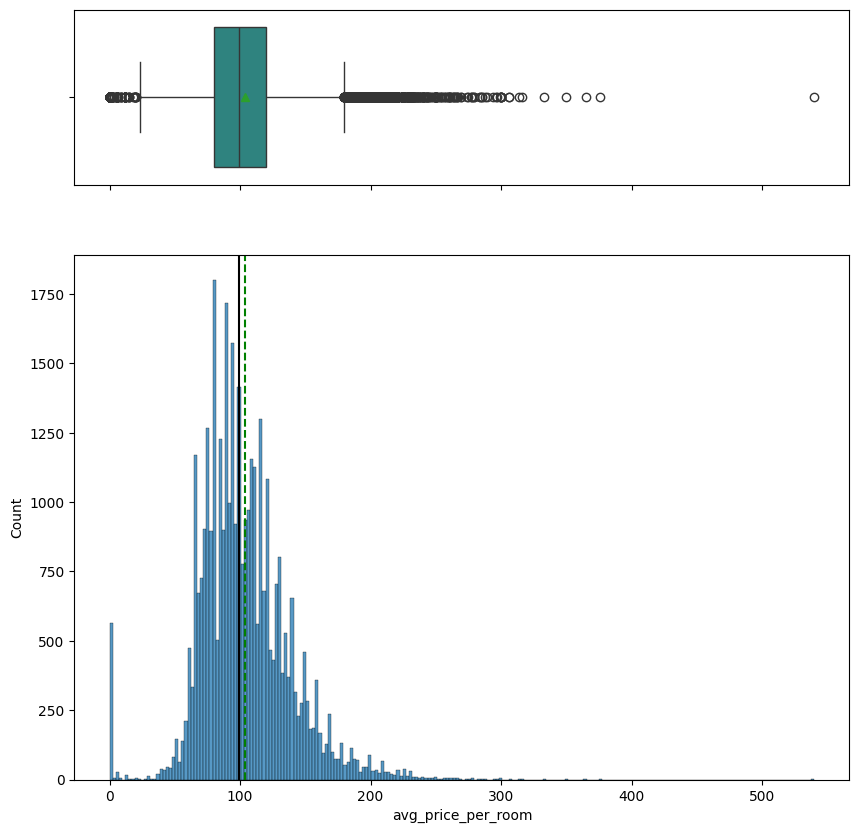

In [20]:
histogram_boxplot(hotel_bookings_df, 'avg_price_per_room')

In [21]:
hotel_bookings_df[hotel_bookings_df['avg_price_per_room'] == 0]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0             0.00000   
145                                       5             0.00000   
209                                       0             0.00000   
266                                       1             0.00000   
267                                       0             0.00000   
...                                     ...                 ...   
35983                         

In [22]:
hotel_bookings_df.loc[hotel_bookings_df['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [23]:
# To address the extreme outliers
# Calculating the 25th quantile
Q1 = hotel_bookings_df['avg_price_per_room'].quantile(0.25)

# Calculating the 75th quantile
Q3 = hotel_bookings_df['avg_price_per_room'].quantile(0.75)  ## Complete the code to calculate 75th quantile for average price per room

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

np.float64(179.55)

In [24]:
# assigning the outliers the value of upper whisker
hotel_bookings_df.loc[hotel_bookings_df['avg_price_per_room'] >= 500, 'avg_price_per_room'] = Upper_Whisker

 ***Observations:***

 - The distribution of average room price is right-skewed,Outliers exist on both ends of the distribution.
 - The average room price is approximately 100 euros.
 - We observe the average room price exceeding 500 euros, which will be clipped to the upper whisker (Q3 + 1.5 x IQR) to limit its influence.
 - We also observe a few rooms show a room price of 0, which may require further investigation to assess data validity.
 - In the market segment column, it looks like many values are complementary.
 - The volume of online bookings could be part of hotel-led promotional initiative.

### Observations on number of previous booking cancellations

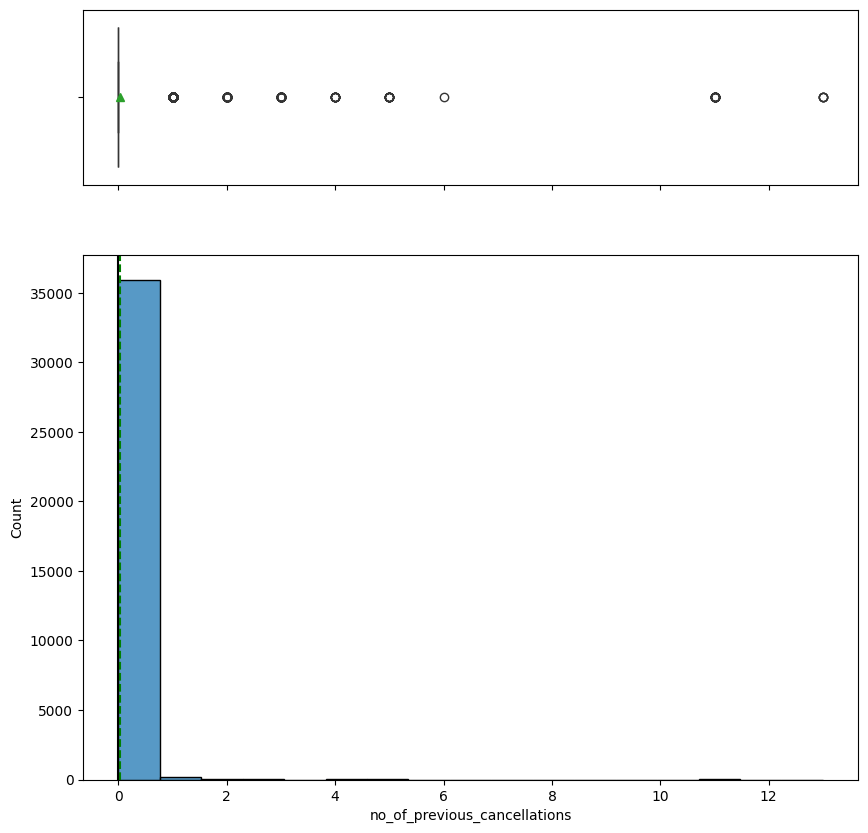

In [25]:
histogram_boxplot(hotel_bookings_df, 'no_of_previous_cancellations')

***Observations:***

 - We observe the majority of customers who previously canceled did so just once, there are very few cases where cancellations exceeded 12 times.

###Observations on number of previous booking not canceled

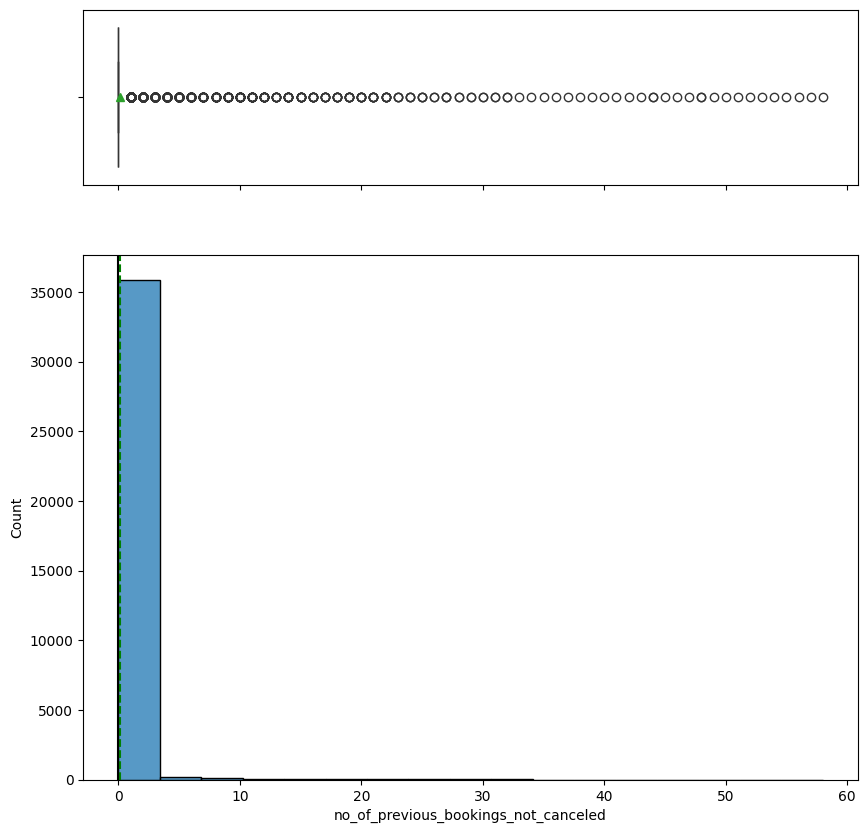

In [26]:
histogram_boxplot(hotel_bookings_df, 'no_of_previous_bookings_not_canceled')

***Observations:***

- We observe a very small number of customers have made more than one not canceled bookings.
- Also, a small yet notable group of highly loyal customers have successfully completed up to 60 bookings without a single cancellation.

###Observations on number of adults

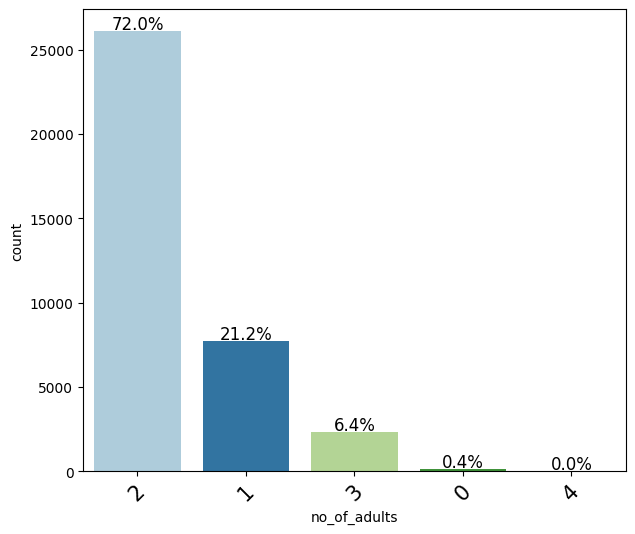

In [27]:
labeled_barplot(hotel_bookings_df, 'no_of_adults', perc=True)

***Observations:***

- We observe the heavily centered distribution of around 72% of bookings for the 2 adults.
- Single-adult bookings represents around 21%.
- Bookings with 3 adults are relatively rare (6.4%), while 0 adults make up only 0.4%.
- No instances of 4-adult bookings were recorded (0.0%).



###Observations on number of children

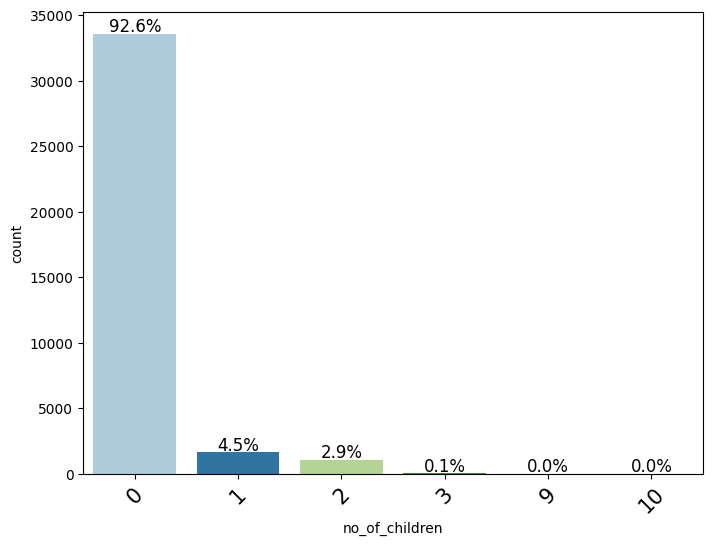

In [28]:
labeled_barplot(hotel_bookings_df, 'no_of_children', perc=True)

***Observations:***

- 93% of the customers didn't make reservations for children.
- We observe there are some values in the data where the number of children is 9 or 10, which is highly unlikely.
- We will replace these values with the maximum value of 3 children.

In [29]:
# replacing 9, and 10 children with 3
hotel_bookings_df['no_of_children'] = hotel_bookings_df['no_of_children'].replace([9, 10], 3)

###Observations on number of week nights

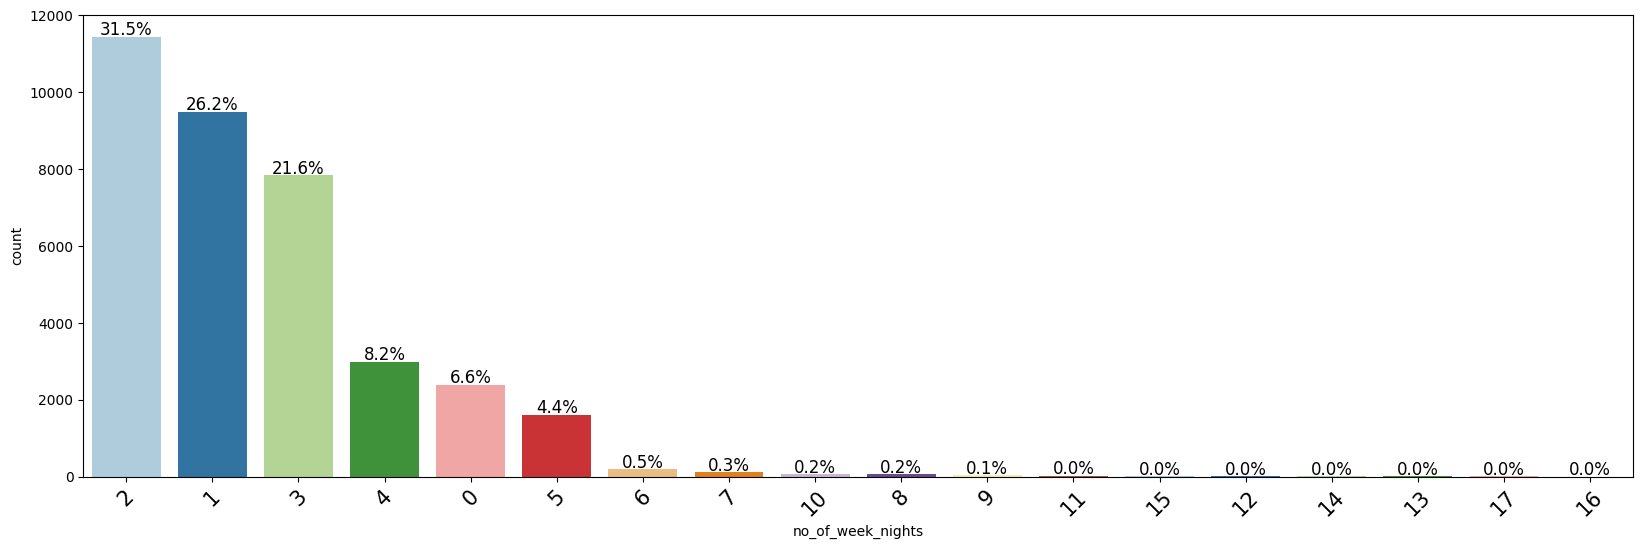

In [30]:
labeled_barplot(hotel_bookings_df, 'no_of_week_nights', perc=True)

***Observations:***

 - The majority of bookings are for short stays, with 2-night bookings accounting for 31.5%, followed by 1-night (26.2%) and 3-night (21.6%) stays.

###Observations on number of weekend nights

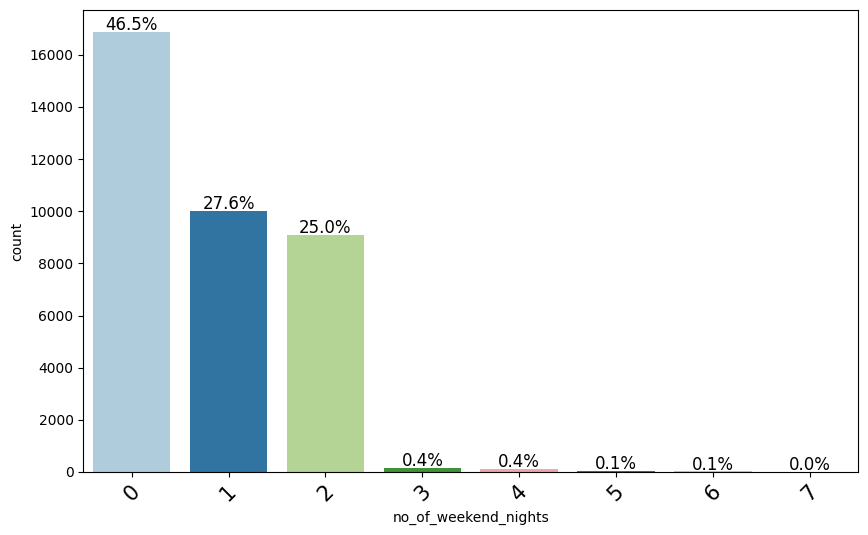

In [31]:
labeled_barplot(hotel_bookings_df, 'no_of_weekend_nights', perc=True)

***Observations:***

- Approximately 46.5% of customers do not intend to stay over the weekend.
- We observe the proportions of guests planning for 1 and 2 weekend nights are nearly equal.

###Observations on required car parking space

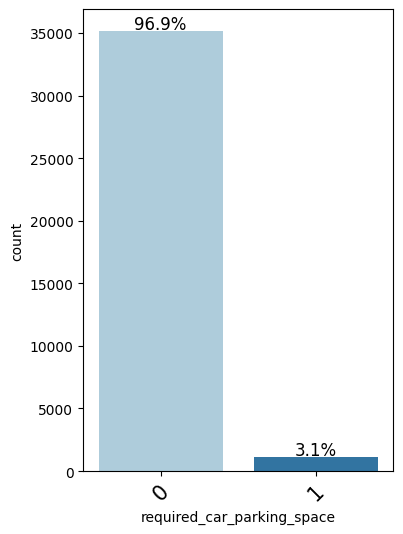

In [32]:
labeled_barplot(hotel_bookings_df, 'required_car_parking_space', perc=True)

***Observations:***

 - 96.9% of the customers do not require a car parking space, 3.1% of customers require car parking space.

###Observations on type of meal plan

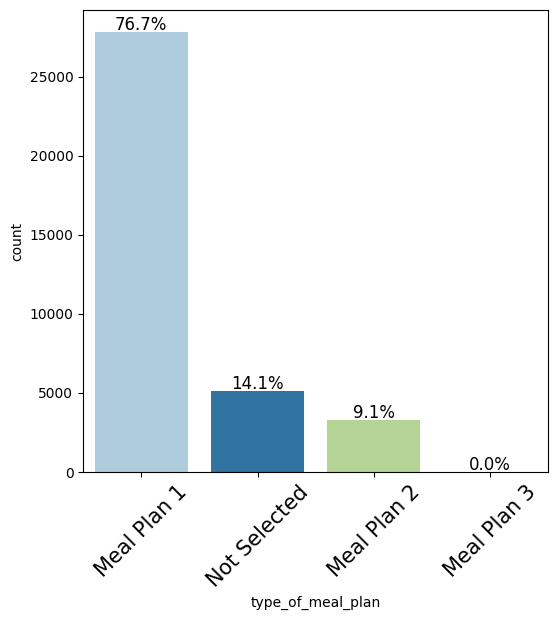

In [33]:
labeled_barplot(hotel_bookings_df, 'type_of_meal_plan', perc=True)


***Observations:***

 - Meal Plan 1 is the most preferred option among customers, while 14.1% chose not to select any meal plan.

###Observations on room type reserved

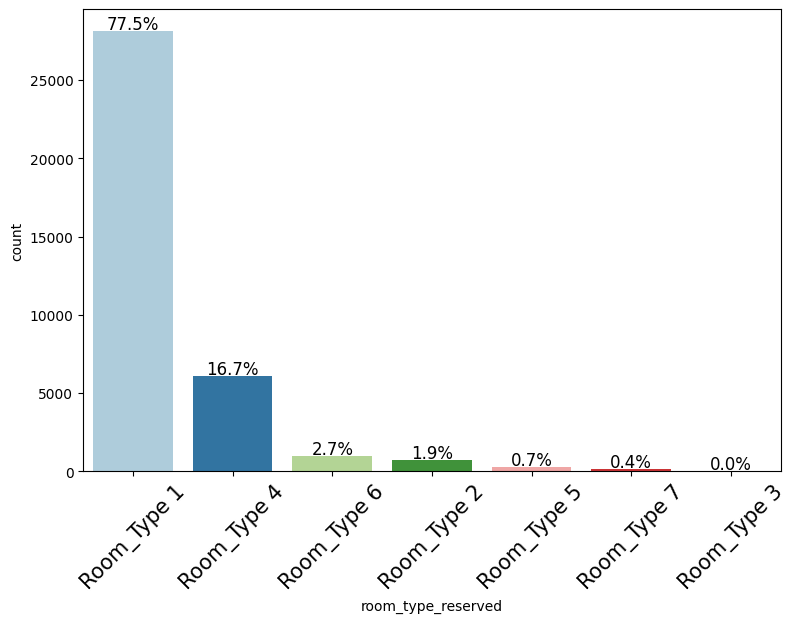

In [34]:
labeled_barplot(hotel_bookings_df, 'room_type_reserved', perc=True)

***Observations:***

 - Around 77% of the customers booked Room_Type 1 followed by around 17% of the customers booking Room_Type 4.
 - Room_Type 3 has no bookings recorded.

###Observations on arrival month

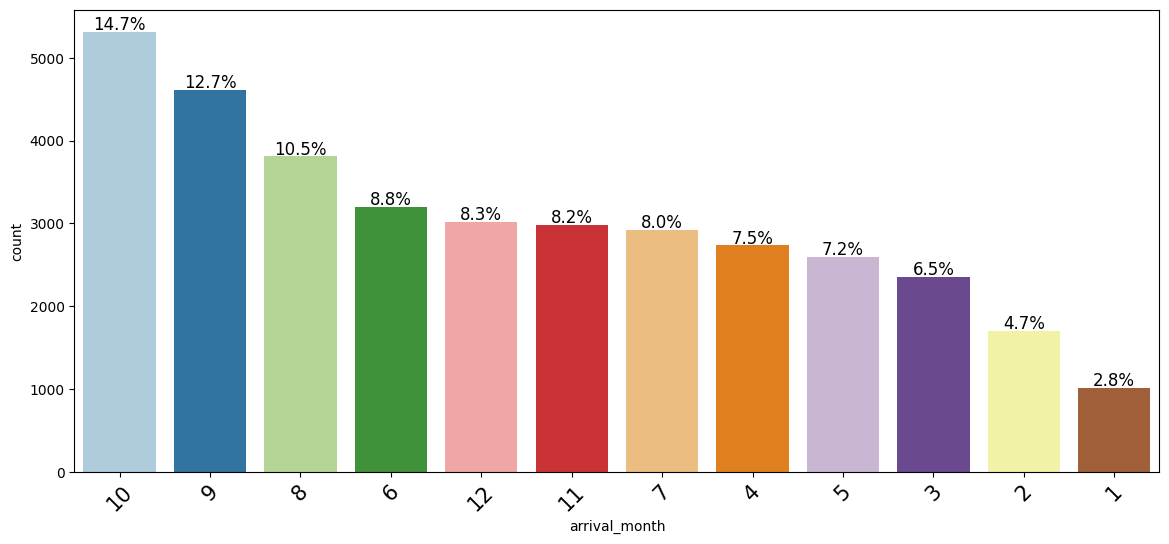

In [35]:
labeled_barplot(hotel_bookings_df, 'arrival_month', perc=True)

***Observations:***

 - October (14.7%) is the busiest month for the hotel bookings followed by September (12.7%).


###Observations on market segment type

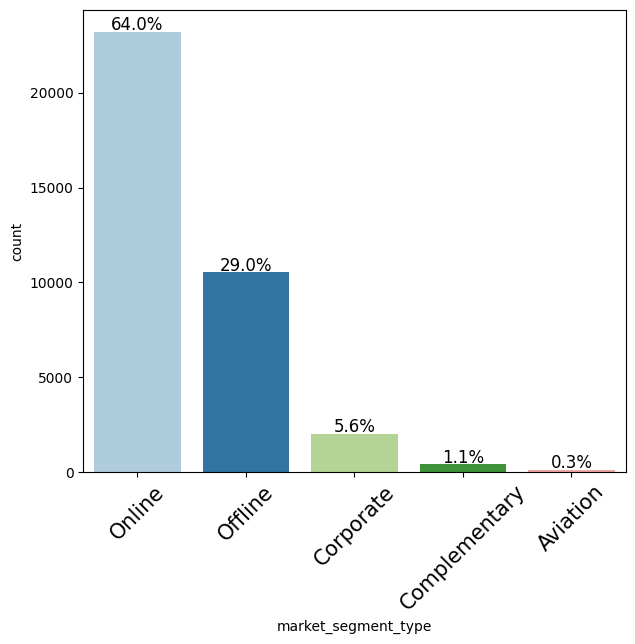

In [36]:
labeled_barplot(hotel_bookings_df, 'market_segment_type', perc=True)

***Observations:***

 - Online market segment accounted for 64% of hotel bookings, followed by offline around 29%.

###Observations on number of special requests

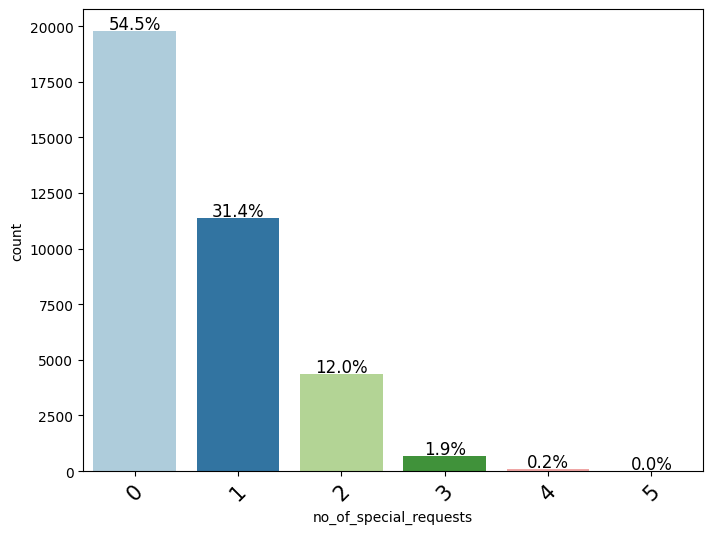

In [37]:
labeled_barplot(hotel_bookings_df, 'no_of_special_requests', perc=True)

***Observations:***

 - 54.5% of the customers generally do not make any requests while booking a hotel room.
 - 31.4% of the customers make 1 special request while booking a hotel room.
 - 12% of the customers make 2 special requests while booking a hotel room.
 - 1.9% of the customers make 3 special requests while booking a hotel room.
 - 0.2% of the customers make 4 special requests while booking a hotel room.

###Observations on booking status

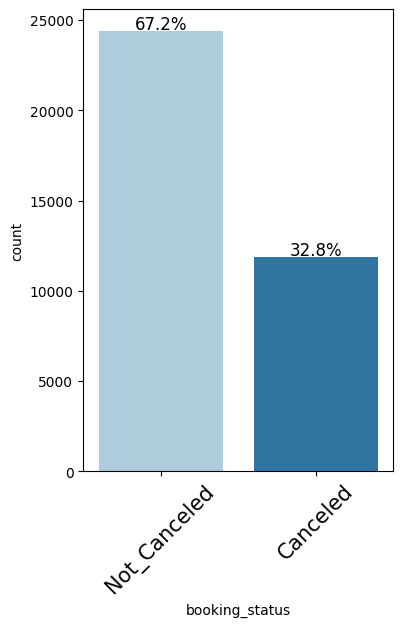

In [38]:
labeled_barplot(hotel_bookings_df, 'booking_status', perc=True)

***Observations:***

 - 67.2% of the bookings were not canceled by the customers.
 - 32.8% of the bookings were canceled by the customers.


In [39]:
 # encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis
hotel_bookings_df['booking_status'] = hotel_bookings_df['booking_status'].apply(
    lambda x: 1 if x == 'Canceled' else 0)

##Bivariate Analysis

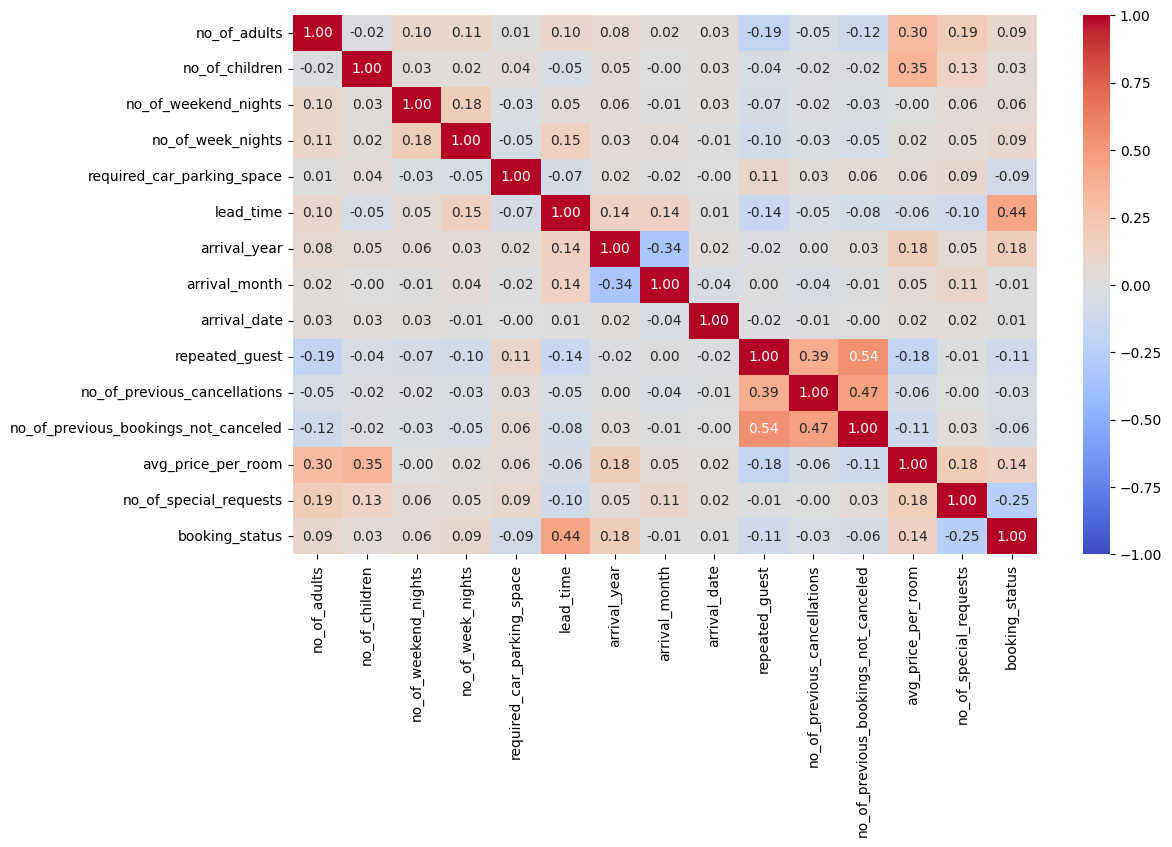

In [40]:
# select the numerical variable
col_list = hotel_bookings_df.select_dtypes(include=np.number).columns.tolist()

# create matrix
plt.figure(figsize=(12, 7))
sns.heatmap(
    hotel_bookings_df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm'
)
plt.show()

***Observations:***

- A positive correlation exists between the number of customers (adults and children) and the average room price, likely due to increased room requirements for larger groups.
- A negative correlation between average room price and repeat guests suggests that loyal customers may be receiving preferential pricing or promotional incentives.
- We observe a positive correlation between the number of previous canceled bookings, non-canceled bookings, and repeat guest status. This indicates that customers with more booking history regardless of outcomes are more likely to return.
- There is a positive correlation between lead time and the number of weeknights booked, indicating that guests planning longer weekday stays tend to book further in advance.
- Longer lead times appear to be associated with higher cancellation probabilities.
- A negative correlation is observed between the number of special requests and booking cancellations, suggesting that guests who make specific requests are less likely to cancel their reservations.


*1. What are the busiest months in the hotel?*

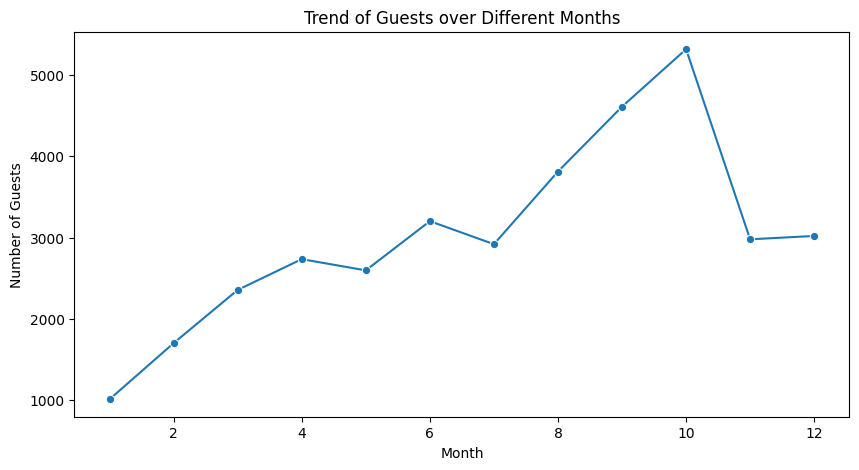

In [41]:
# group the data on arrival months and extracting the count of bookings
monthly_data = hotel_bookings_df.groupby(['arrival_month'])['booking_status'].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {'Month': list(monthly_data.index), 'Guests': list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x='Month', y='Guests', marker='o')
plt.title('Trend of Guests over Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.show()

***Answer:***


*   The number of guests shows a rising trend from month 1 to month 10, reaching a peak in month 10.

*  Also there is asignificant decline follows in month 11, after which the guest numbers stabilizes around 3000.





*2. Which market segment do most of the guests come from?*

In [42]:
# Checking the distribution of guests across market segments
hotel_bookings_df['market_segment_type'].value_counts()


market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

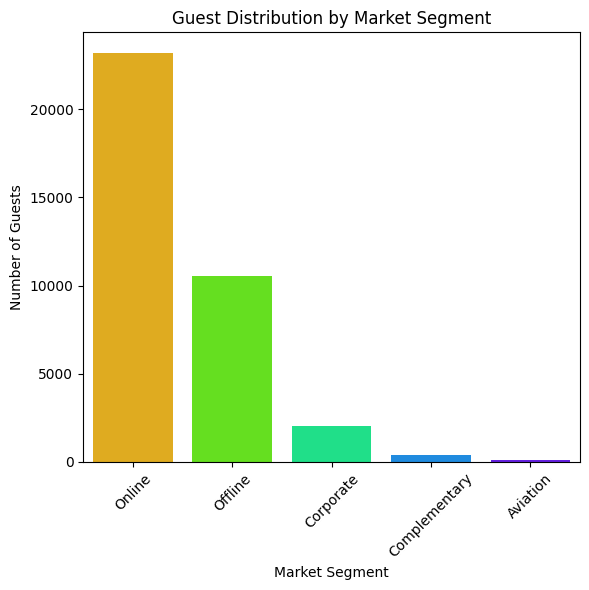

In [43]:
# Visualize the distribution of guests across market segments
plt.figure(figsize=(6,6))
sns.countplot(data=hotel_bookings_df, x='market_segment_type', order=hotel_bookings_df['market_segment_type'].value_counts().index, palette='gist_rainbow')
plt.xticks(rotation=45)
plt.title('Guest Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Guests')
plt.tight_layout()
plt.show()

***Answer:***

 *  Guests predominantly come from the Online market segment followed by the Guest bookings which were made offline.




*3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?*

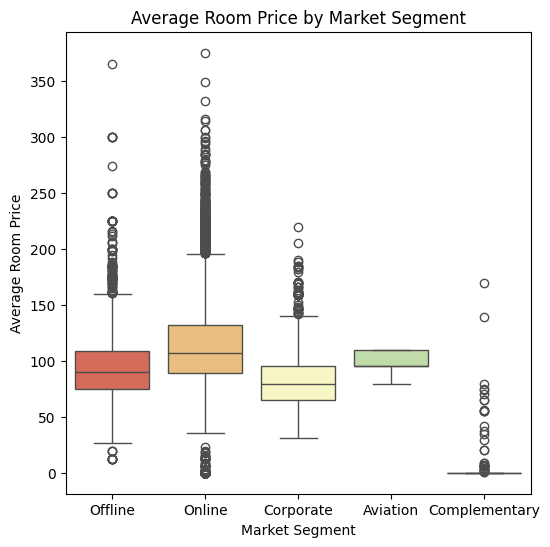

In [44]:
# visualize the distribution between average room price and market segment
plt.figure(figsize=(6, 6))
sns.boxplot(data=hotel_bookings_df, x='market_segment_type', y='avg_price_per_room', palette='Spectral')
plt.title('Average Room Price by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Room Price')
plt.show()

***Answer:***


*   The online market segment demonstrates wide price dispersion, indicating dynamic pricing strategies.
*   corporate and offline prices remains relatively consistent.
*   complimentary bookings are offered with minimal or no room charges.




*4. What percentage of bookings are canceled?*

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


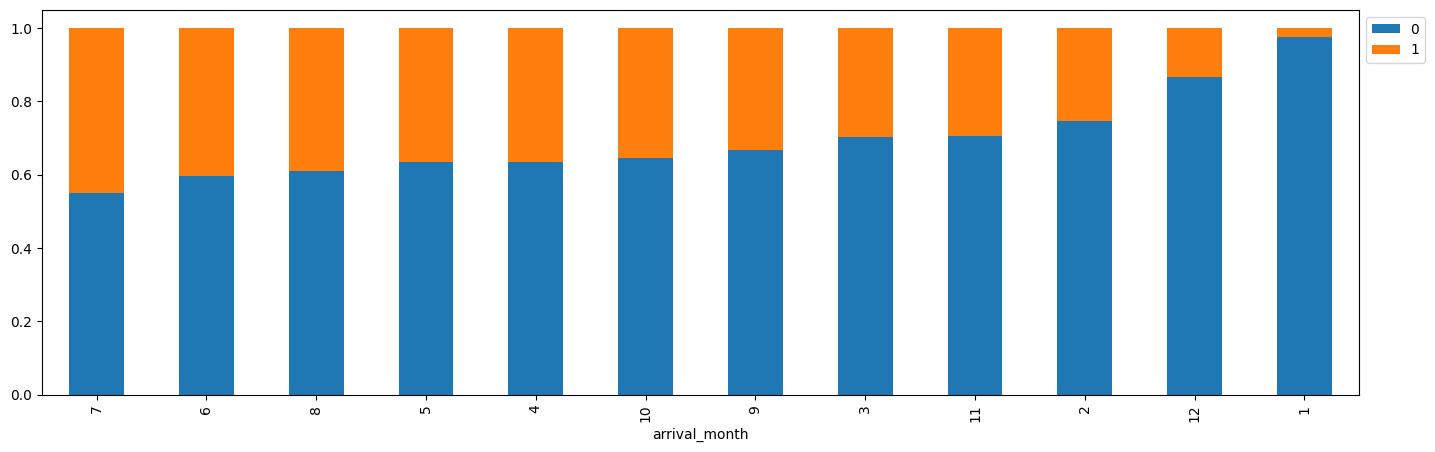

In [45]:
stacked_barplot(hotel_bookings_df, 'arrival_month', 'booking_status')

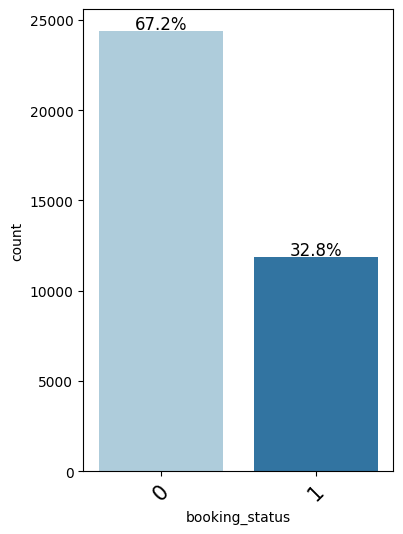

In [46]:
labeled_barplot(hotel_bookings_df, 'booking_status',perc=True)

In [47]:
# Create a new column to flag cancellations
hotel_bookings_df['is_canceled'] = hotel_bookings_df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Calculate monthly cancellation percentage
monthly_cancellation = hotel_bookings_df.groupby('arrival_month')['is_canceled'].agg(['mean', 'count']).reset_index()
monthly_cancellation['cancellation_rate'] = monthly_cancellation['mean'] * 100

# view the month wise cancellations
monthly_cancellation[['arrival_month', 'cancellation_rate']].sort_values('arrival_month')


arrival_month  cancellation_rate
0               1            0.00000
1               2            0.00000
2               3            0.00000
3               4            0.00000
4               5            0.00000
5               6            0.00000
6               7            0.00000
7               8            0.00000
8               9            0.00000
9              10            0.00000
10             11            0.00000
11             12            0.00000

***Answer:***


*  Overall 32.8% of bookings are cancelled.
*  Though September and October marked peak booking periods, they experienced a cancellation rate of around 34%.
*  July records the highest cancellation rate among all months, with 45% of bookings cancelled.
*  December and January have fewer cancellations—possibly due to end-of-year celebrations.



In [48]:
hotel_bookings_df.drop('is_canceled', axis=1, inplace=True)

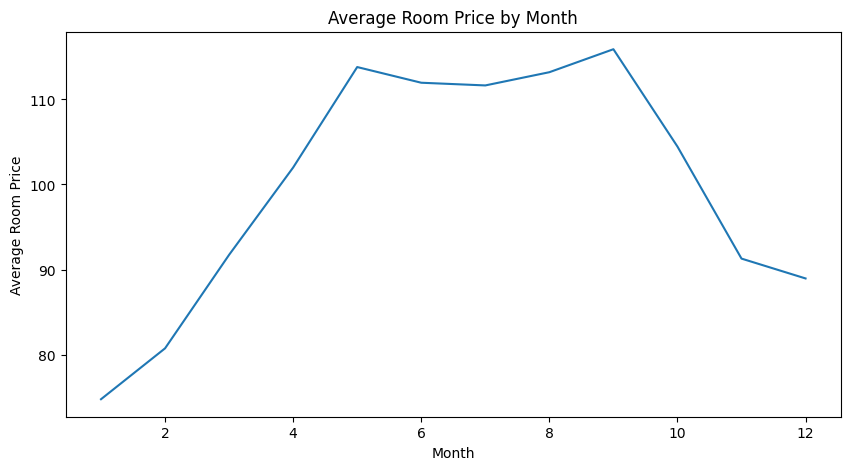

In [49]:
# check how prices vary across different months
plt.figure(figsize=(10, 5))
sns.lineplot(y=hotel_bookings_df['avg_price_per_room'], x=hotel_bookings_df['arrival_month'], ci=None)
plt.title('Average Room Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Room Price')
plt.show()

- The period from May to September marks the most expensive months, with room rates is around 115 euros.

*5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?*

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


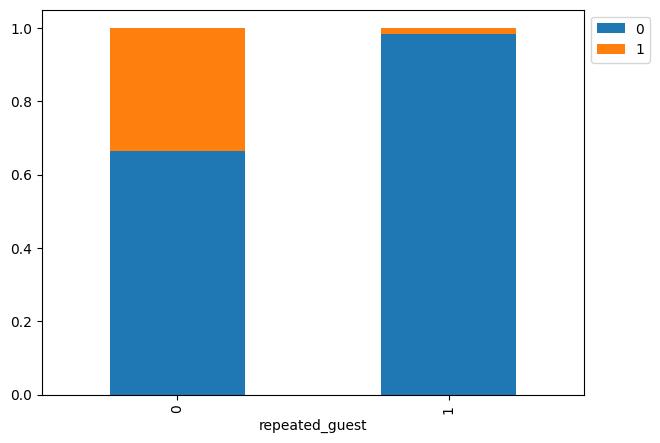

In [50]:
stacked_barplot(hotel_bookings_df, 'repeated_guest', 'booking_status')

***Answer:***

- We observe that repeated guests bookings are relatively low, repeated guests show strong commitment, with very few cancellations.This highlights the strategic advantage of fostering loyalty reducing acquisition costs and boosting profitability through familiarity and referrals.

*6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?*

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


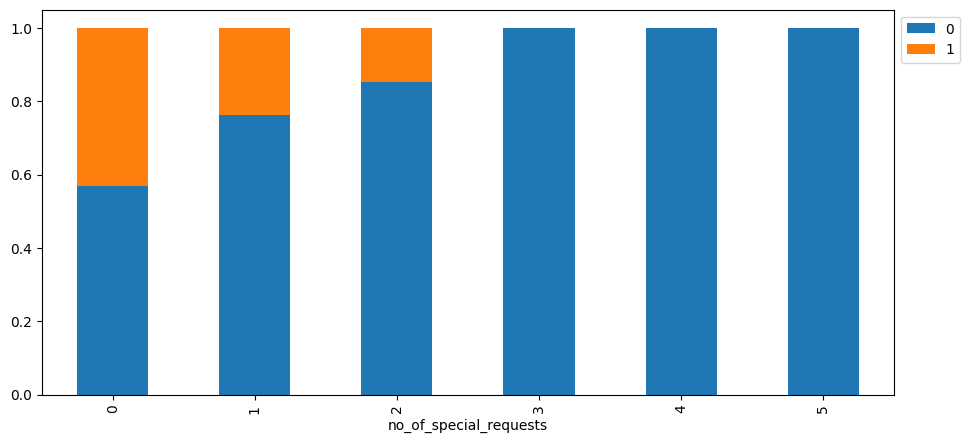

In [51]:
#barplot to view pattern between special requests to booking status
stacked_barplot(hotel_bookings_df, 'no_of_special_requests', 'booking_status')


***Answer:***

*   We observe that the guests who made more than 2 special requests are more likely will not be cancelled.




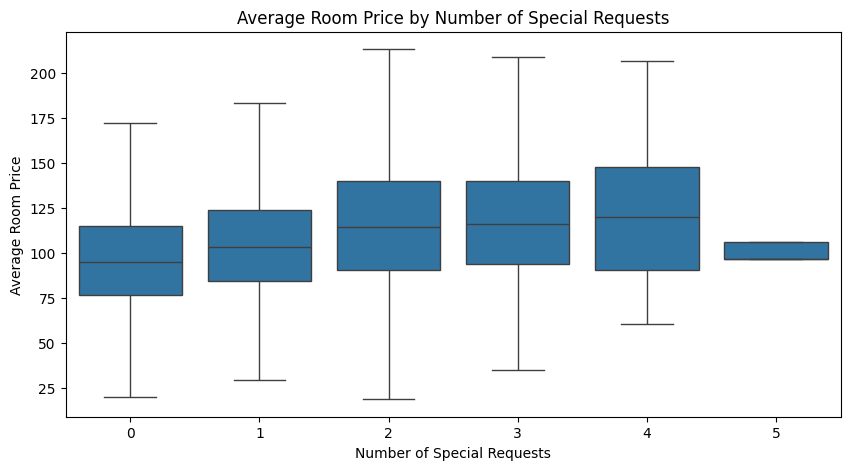

In [52]:
#visualize the special requests made by the customers impacts the prices of a room

plt.figure(figsize=(10, 5))
sns.boxplot( data=hotel_bookings_df,x='no_of_special_requests',y='avg_price_per_room',showfliers=False)
plt.title('Average Room Price by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Room Price')
plt.show()

***Observations:***

Rooms with special requests have a slightly higher median price compared to those without any special requests

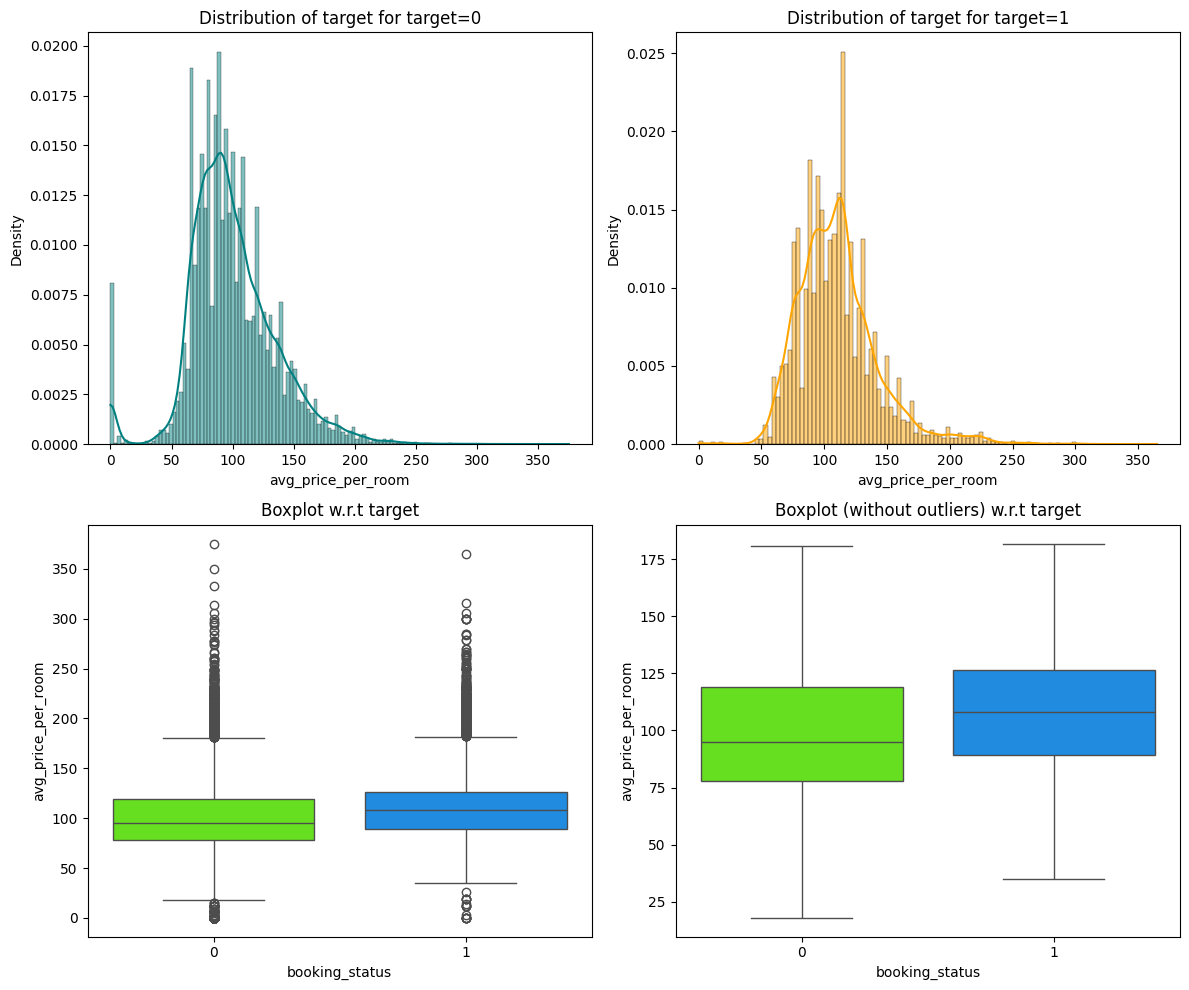

In [53]:
# visualize the correlation between booking status and average price per room
distribution_plot_wrt_target(hotel_bookings_df, 'avg_price_per_room', 'booking_status')

***Observations:***

 - Cancelled and confirmed bookings share a similar pricing pattern, but the cancelled bookings tend to occur at slightly higher room prices.

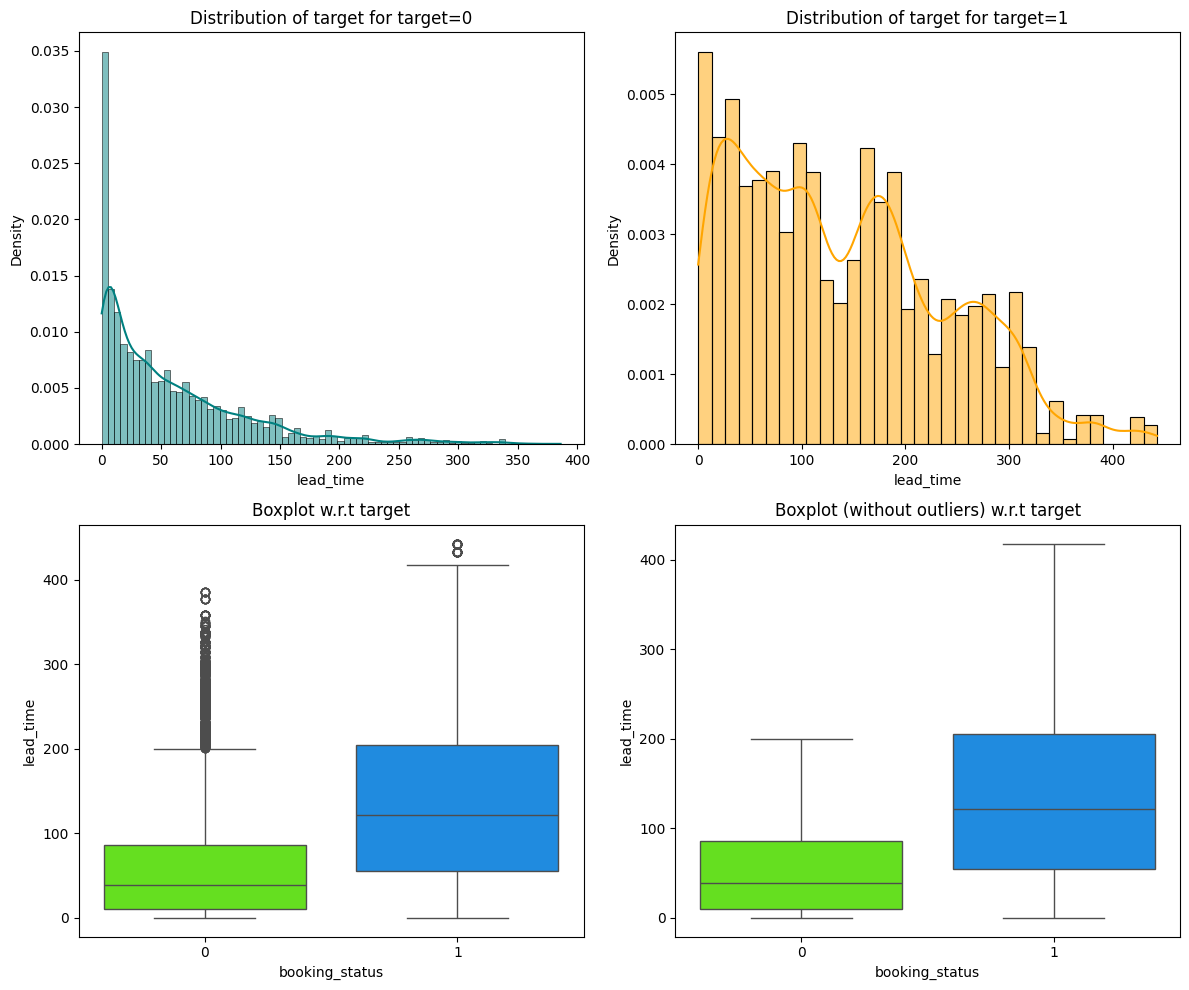

In [54]:
# visualize the correlation between booking status and lead time

distribution_plot_wrt_target(hotel_bookings_df, 'lead_time', 'booking_status')

***Observations:***

- As lead time rises,the probability of a booking being canceled also rises.

(28441, 18)
booking_status            0     1    All
count_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


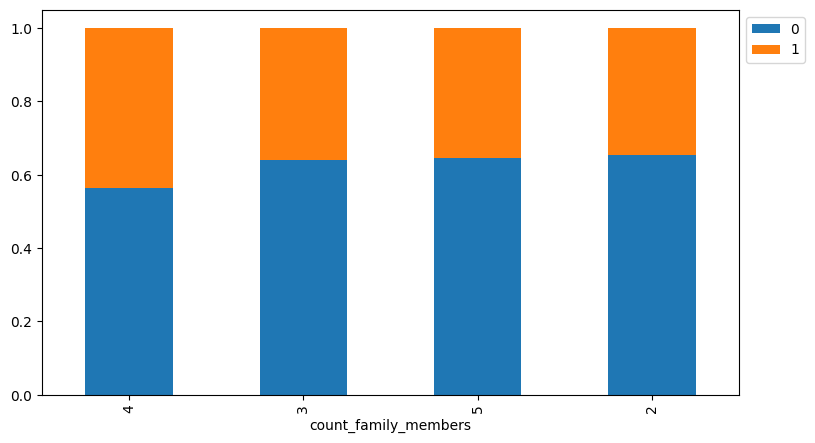

In [55]:
#Analyse and visualize the impact of customers bookings who travel with their family
cust_family_df = hotel_bookings_df[(hotel_bookings_df['no_of_children'] >= 0) & (hotel_bookings_df['no_of_adults'] > 1)]
print(cust_family_df.shape)
cust_family_df['count_family_members'] = (cust_family_df['no_of_adults'] + cust_family_df['no_of_children'])

stacked_barplot(cust_family_df, 'count_family_members', 'booking_status')

***Observations:***

 - We observe for the 2-5 family members, the cancellation rate is around 40-50%,indicates volatility.
 - There is no cancellations observed for the bookings with 12 family members, where as bookings with 11 family members were entirely cancelled.

(17094, 18)
booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------

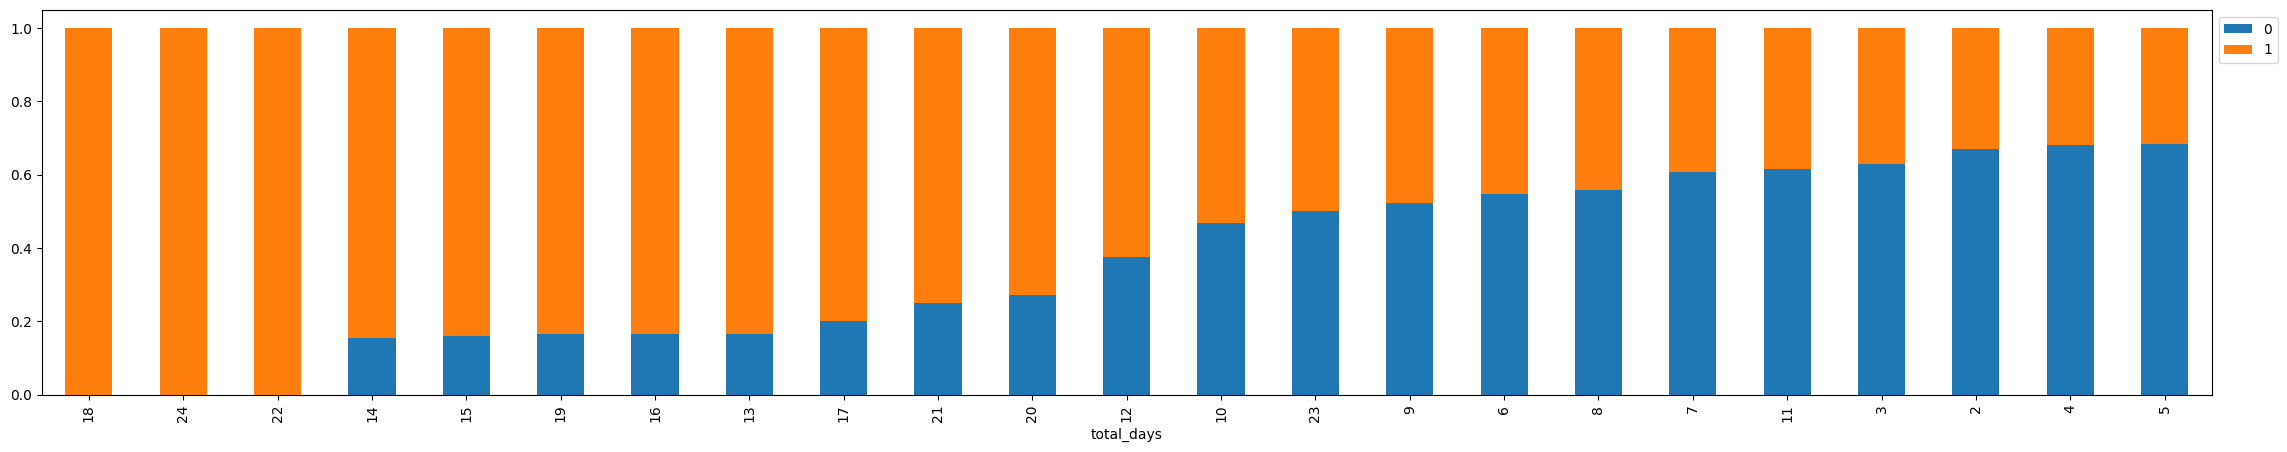

In [56]:
# Analyse and Visualize the customer trend who stay for at least a day at the hotel.

customer_stay_df = hotel_bookings_df[(hotel_bookings_df['no_of_week_nights'] > 0) & (hotel_bookings_df['no_of_weekend_nights'] > 0)]
print(customer_stay_df.shape)
customer_stay_df['total_days'] = (customer_stay_df['no_of_week_nights'] +customer_stay_df['no_of_weekend_nights'])

stacked_barplot(customer_stay_df, 'total_days', 'booking_status')

***Observations:***

 - We observe the cancellation increases when the customer plan to stay for the number of days increases.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [57]:
#missing Values Analysis
hotel_bookings_df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

***Observations:***

- There are no missing values in the data.

### Outlier Check


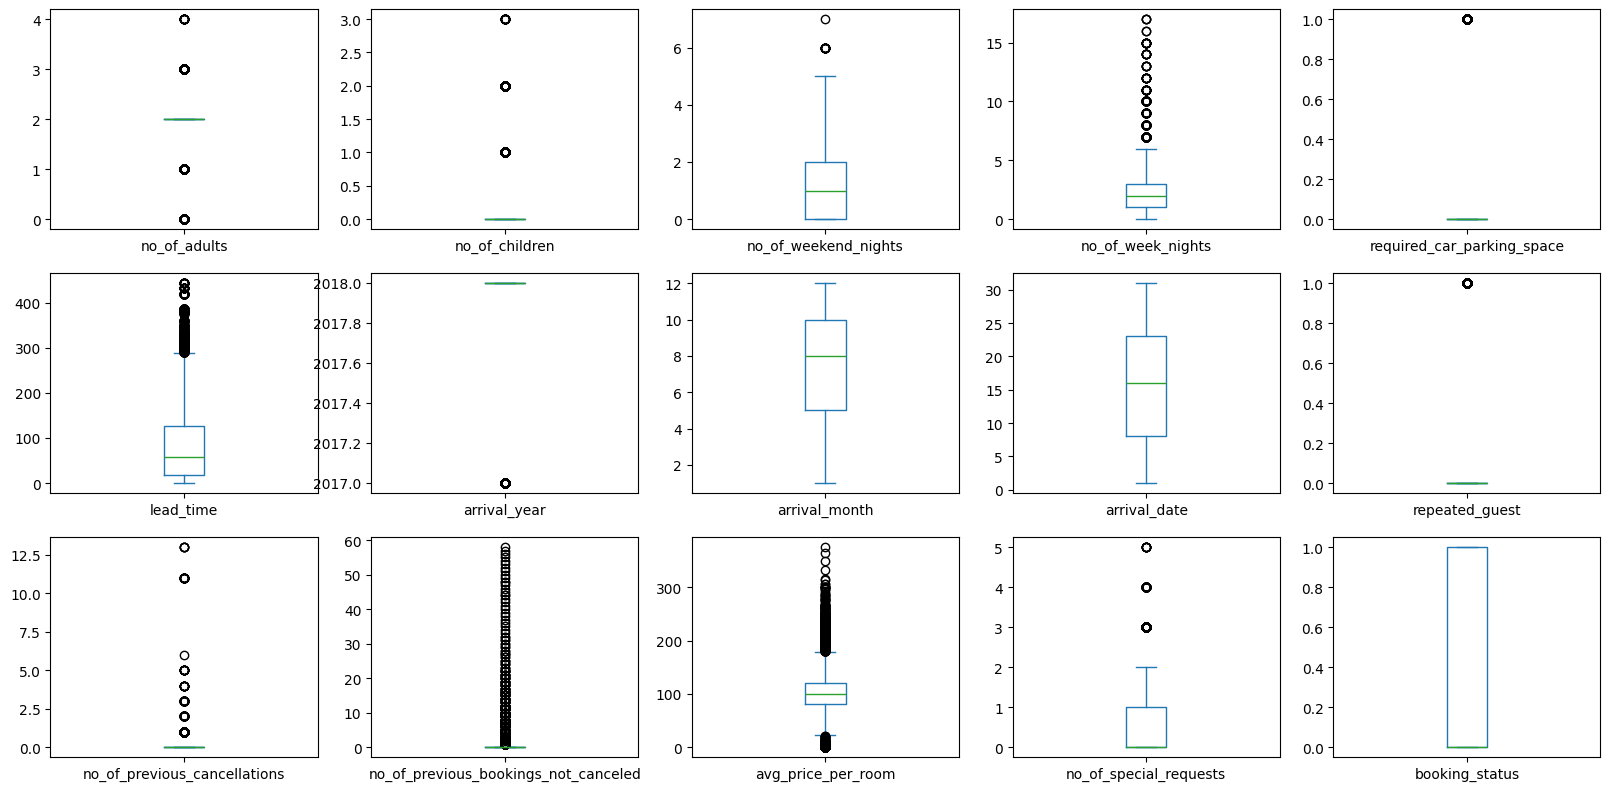

In [58]:
#boxplot and whisker plots
hotel_bookings_df.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()


***Observations:***

 - While outliers are present, they are retained as they may have potential information value.

## Logistic Regression model

### Logistic Regression (with statsmodels library)

####Data Preparation - Logistic Regression

In [59]:
X = hotel_bookings_df.drop(['booking_status'], axis=1)
Y = hotel_bookings_df['booking_status']

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [60]:
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


#### Model evaluation criterion



### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.


In [61]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],
    )

    return df_perf

In [62]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

####Building Logistic Regression Model

In [63]:
# fitting logistic regression model
log_reg = sm.Logit(y_train, X_train.astype(float))
lg = log_reg.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.3292
Time:                        18:56:49   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

In [64]:
print('Training performance:')
model_performance_classification_statsmodels(lg, X_train.astype(float), y_train.astype(float))

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [65]:
hotel_df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


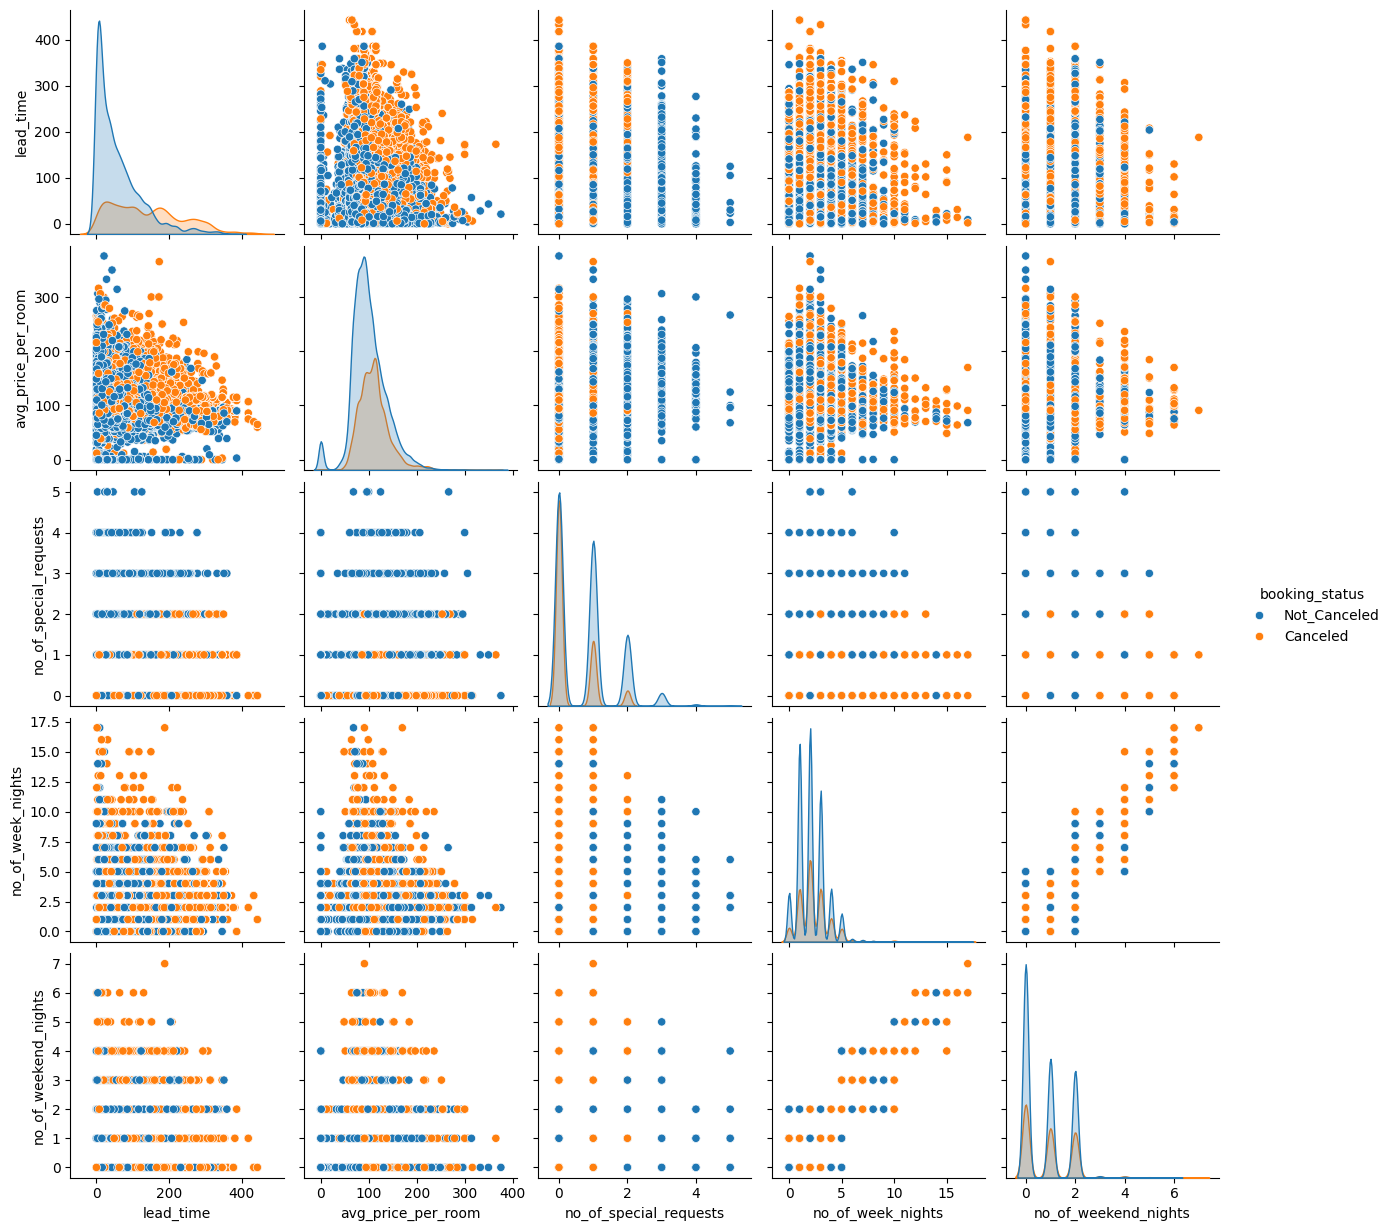

In [66]:
# Revert 'booking_status' to original categorical values for pairplot
hotel_bookings_df['booking_status'] = hotel_bookings_df['booking_status'].apply(lambda x: 'Canceled' if x == 1 else 'Not_Canceled')

# Check the value counts of booking_status in the subset before plotting
print(hotel_bookings_df[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_week_nights', 'no_of_weekend_nights', 'booking_status']]['booking_status'].value_counts())

sns.pairplot(hotel_bookings_df[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_week_nights', 'no_of_weekend_nights', 'booking_status']], hue='booking_status')

# Encode 'booking_status' back to numerical for further analysis
hotel_bookings_df['booking_status'] = hotel_bookings_df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [67]:
# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns

    # calculating VIF for each feature
    vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [68]:
checking_vif(X_train.astype(float))

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

***Observations:***

Multicollinearity is minimal across all numeric features, and will ignore VIF values corresponding to dummy variables.

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [69]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux.astype(float)).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [70]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [71]:
log_reg1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = log_reg1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 22 Jun 2025   Pseudo R-squ.:                  0.3282
Time:                        18:58:18   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [72]:
print('Training performance:')
model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

***Observations:***

 - All remaining variables have p-values below 0.05, indicating statistical significance. Hence, model lg1 is suitable for inference,and the training performance remains unchanged after excluding high p-value features.

Performance on the test set

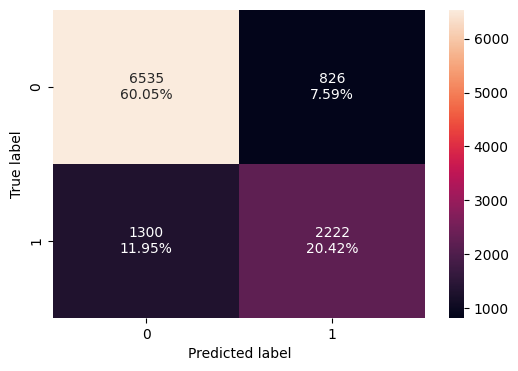

In [73]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

In [74]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1.astype(float), y_test.astype(float))

print('Test performance:')
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [75]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option('display.max_columns', None)

# adding the odds to a dataframe
pd.DataFrame({'Odds': odds, 'Change_odd%': perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

Checking model performance on the training set

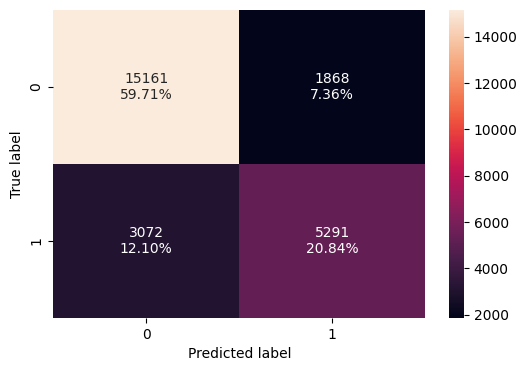

In [76]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))

In [77]:
print('Training performance:')
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1.astype(float), y_train.astype(float))
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

#### ROC-AUC
* ROC-AUC on training set

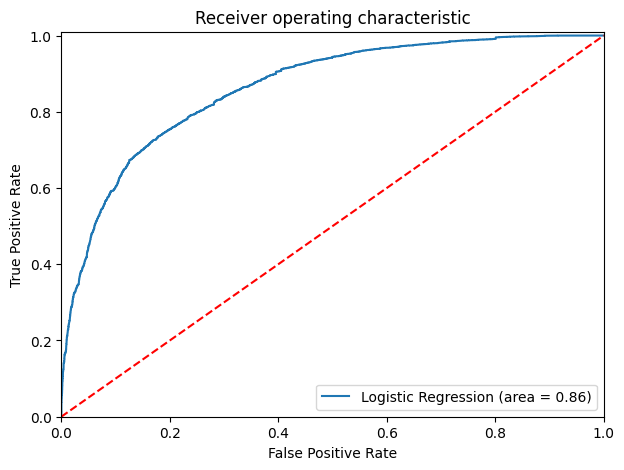

In [78]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

***Observations:***

 - The logistic regression model demonstrates consistent performance across both training and test sets, with a strong ROC-AUC score of 0.86 on the training data.

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [79]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train.astype(float), lg1.predict(X_train1.astype(float)))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587078805


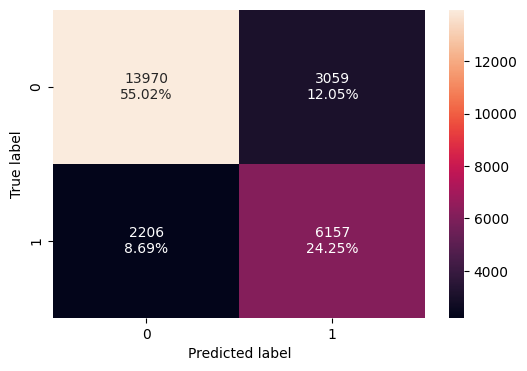

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc)

In [81]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_auc_roc
)
print('Training performance:')
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

***Observations:***

- Compared to the previous model, this model shows a significant gain in recall. Still, reducing the classification threshold increases recall while decreases precision, highlights the need for a carefully choose balance between recall and precision.

check the performance on the test set

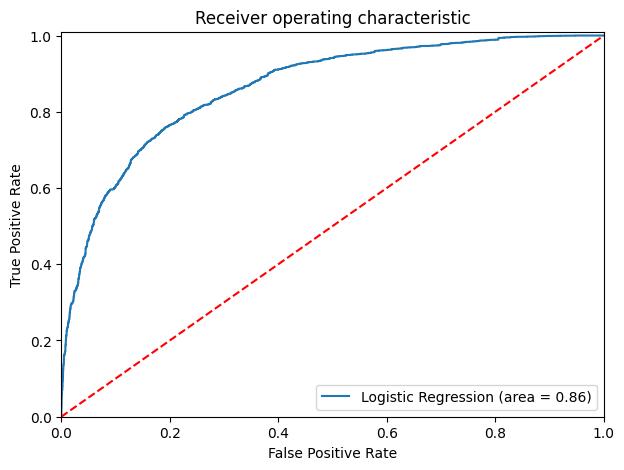

In [82]:
logit_roc_auc_train = roc_auc_score(y_test.astype(float), lg1.predict(X_test1.astype(float)))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), lg1.predict(X_test1.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

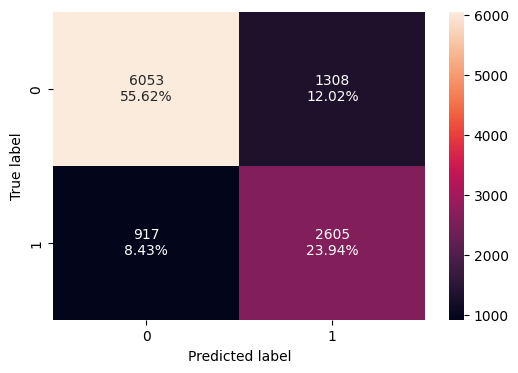

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc)

In [84]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_auc_roc
)
print('Test performance:')
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

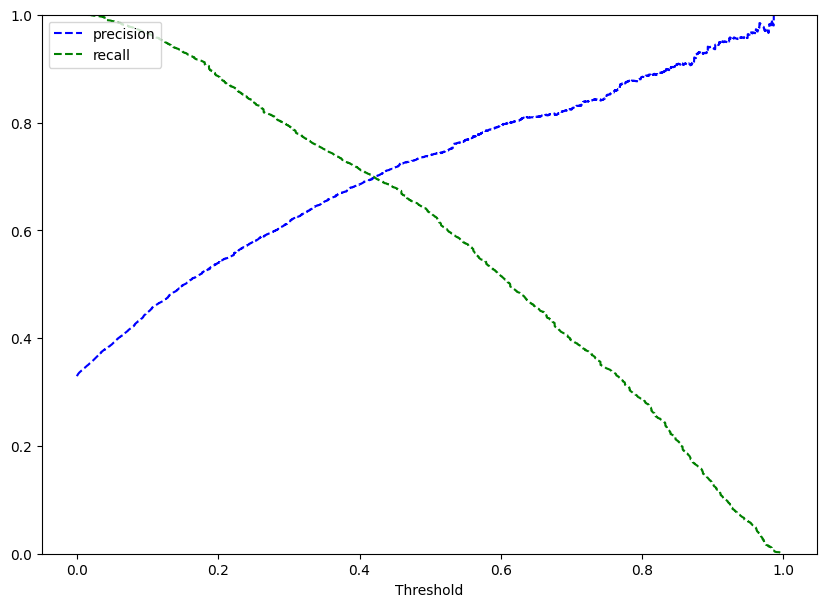

In [85]:
# Precision-recall curve to find better threshold
y_scores = lg1.predict(X_train1.astype(float))
prec, rec, tre = precision_recall_curve(y_train.astype(float), y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 - we get a balanced precision and recall at 0.42 threshold value.

In [86]:
# setting the threshold
optimal_threshold_curve = 0.42

Check the model performance on training set

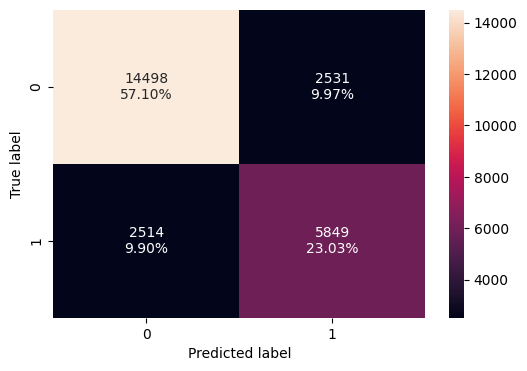

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve)

In [88]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1.astype(float), y_train.astype(float), threshold=optimal_threshold_curve
)
print('Training performance:')
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

***Observation:***

- Compared to the baseline model, there is an improvement in performance.
- Model shows balance in terms of precision and recall.

check the performance on the test set

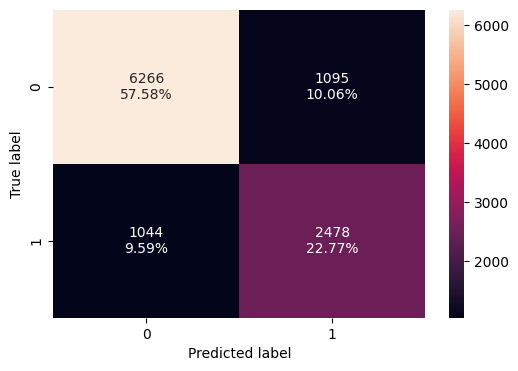

In [89]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)

In [90]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1.astype(float), y_test.astype(float), threshold=optimal_threshold_curve)

print('Test performance:')
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

## Final Model Summary

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    'Logistic Regression-default Threshold',
    'Logistic Regression-0.37 Threshold',
    'Logistic Regression-0.42 Threshold',
]

print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

In [92]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    'Logistic Regression-default Threshold',
    'Logistic Regression-0.37 Threshold',
    'Logistic Regression-0.42 Threshold',
]

print('Test performance comparison:')
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

***Logistic Regression model Observations:***

 - We have built a model capable of predicting cancellation likelihoods with an F1 score of 0.69 on training data. This empowers the hotel to proactively adjust its marketing and booking strategies.
 - Model performance remains stable across both training and test sets, indicates that the logistic regression model is not overfitting and generalize it well.
 - The current threshold gives the hotel confidence in serving customers unlikely to cancel, reinforcing brand trust. But with low recall, many cancellations go undetected—potentially leading to wasted staffing and inventory.
 - Lowering the threshold to 0.37 boosts recall, allowing the hotel to proactively manage likely cancellations. However, the drop in precision could lead to false positives, impacting customer experience and brand equity.
 - With the threshold set at 0.42, the model delivers a balanced performance. This enables the hotel to proactively manage bookings while preserving customer trust and minimizing wasted resources.
 - Features such as required_car_parking_space, arrival_month, repeated_guest, and no_of_special_requests exhibit negative coefficients, indicating a reduction in cancellation likelihood as these values increase. Conversely, variables like no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, and type_of_meal_plan_Not Selected have positive coefficients—suggesting that higher values in these features are associated with a greater probability of cancellation.

#Decision Tree model

##Data Preparation (Decision Tree)

In [93]:
X = hotel_bookings_df.drop(['booking_status'], axis=1)
Y = hotel_bookings_df['booking_status']

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [94]:
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Building a Decision Tree model

In [95]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [96]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],
    )

    return df_perf

In [97]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Checking model performance on training set

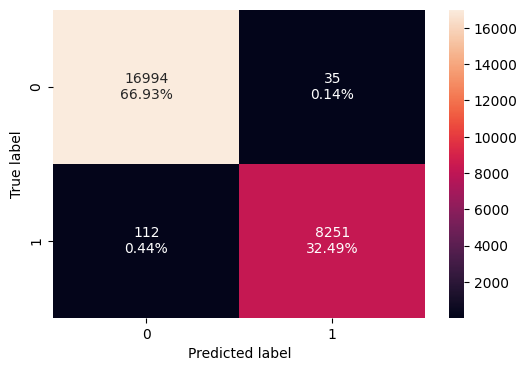

In [98]:
confusion_matrix_sklearn(model, X_train, y_train)

In [99]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

 ***Observation:***

 - The model fits the training data with high accuracy, showing minimal misclassifications—an indication of strong in-sample performance.
 - We observe the decision tree model achieves perfect accuracy on the training set, this may indicate overfitting. Evaluating its performance on the test set will help determine if it generalizes well or has simply memorized the training patterns.

#### Checking model performance on testing


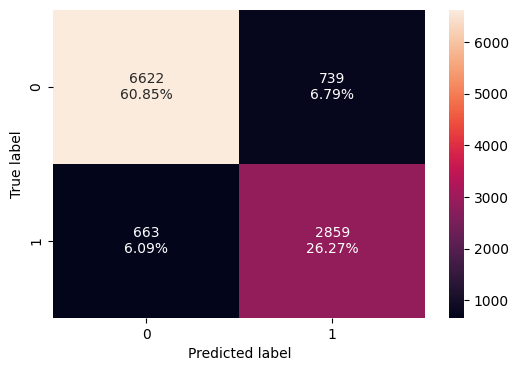

In [100]:
confusion_matrix_sklearn(model, X_test, y_test)

In [101]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

 ***Observation:***

 - We observe the decision tree model is clearly overfitting, capturing training data patterns too precisely and failing to generalize on the test set. To address this, pruning is necessary to reduce model complexity and enhance its performance on unseen data.

## Do we need to prune the tree?

Yes, pruning is necessary to reduce model complexity.

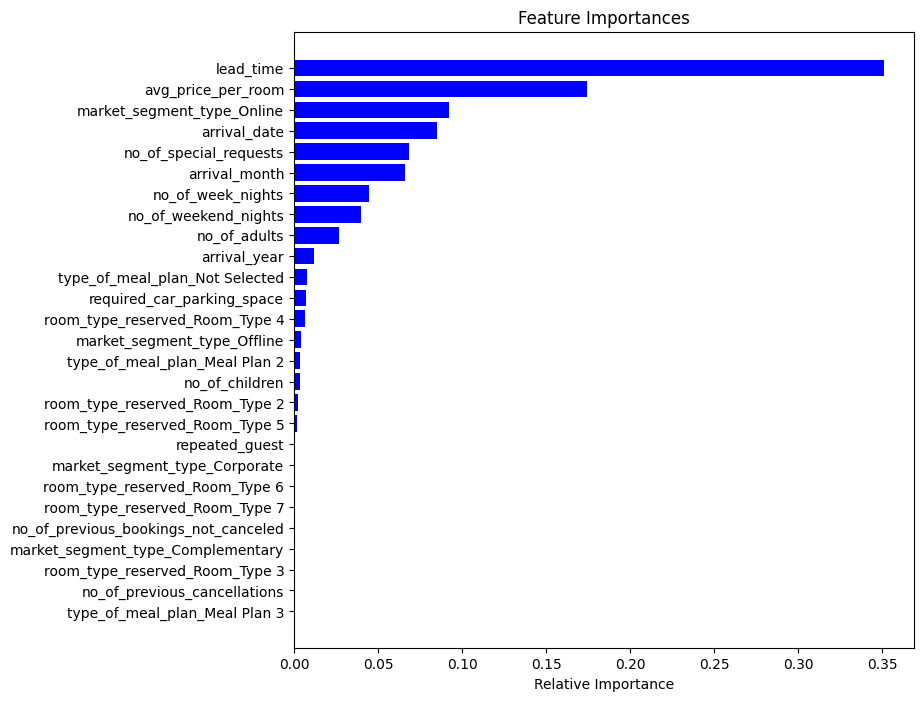

In [102]:
# check for the important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***Observation:***

- We observe lead time is the most important feature followed by average price per room.

###Pre-pruning

In [103]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 7, 2),
    'max_leaf_nodes': [50, 75, 150, 250],
    'min_samples_split': [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

#### Checking model performance on training set

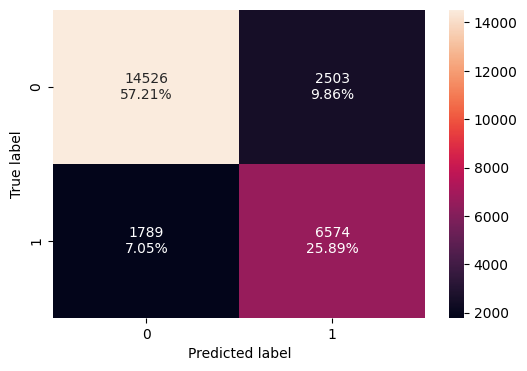

In [104]:
confusion_matrix_sklearn(estimator, X_train.astype(float), y_train.astype(float))

In [105]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

#### Checking model performance on testing set

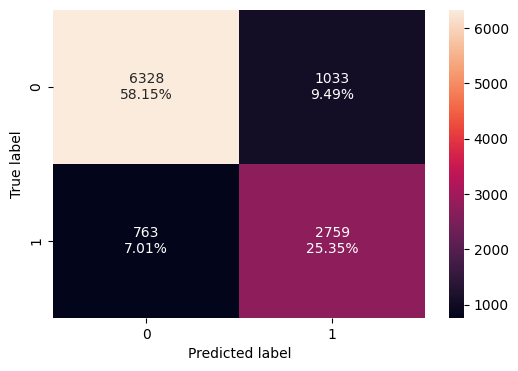

In [106]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [107]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

#### Visualizing the Decision Tree

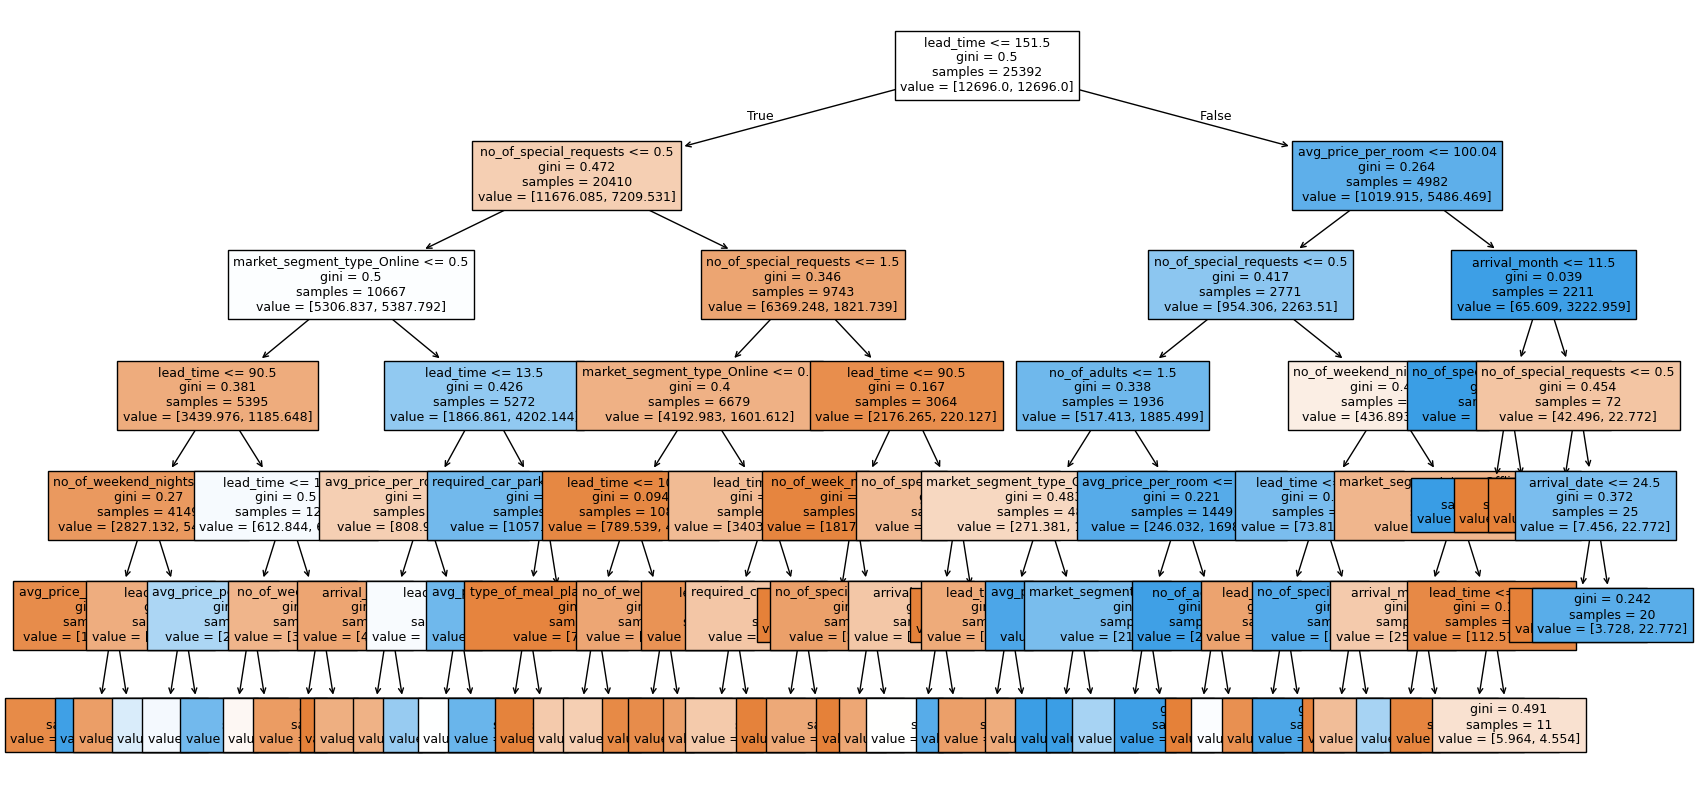

In [108]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [109]:
# report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

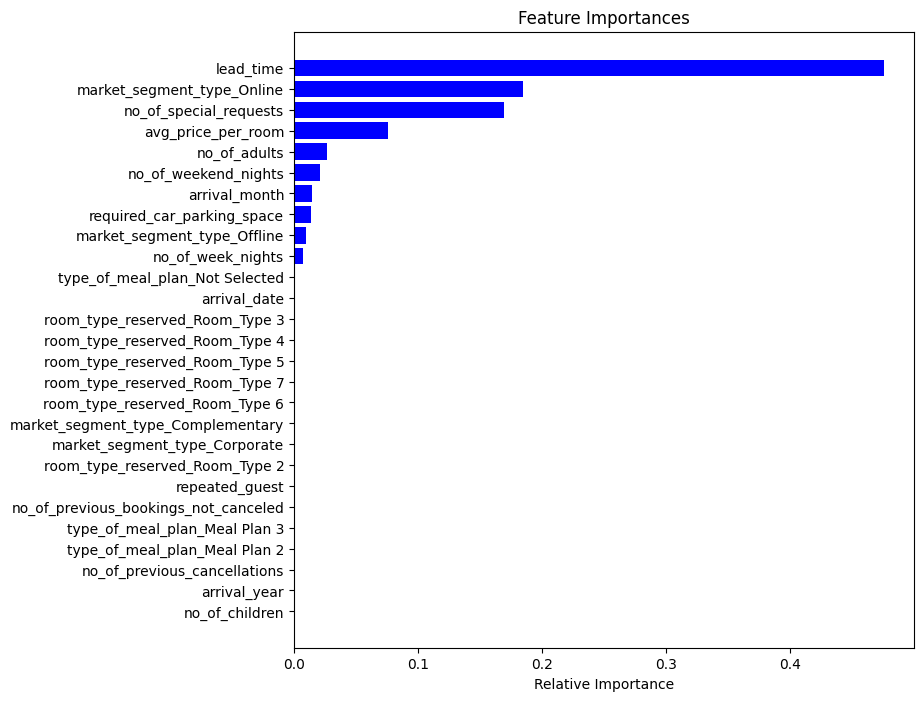

In [110]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***Observations:***

 - We observe that the most important features are:
      - Lead Time
      - Market Segment - Online
      - Number of special requests
      - Average price per room

###Cost complexity pruning

In [111]:
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [112]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

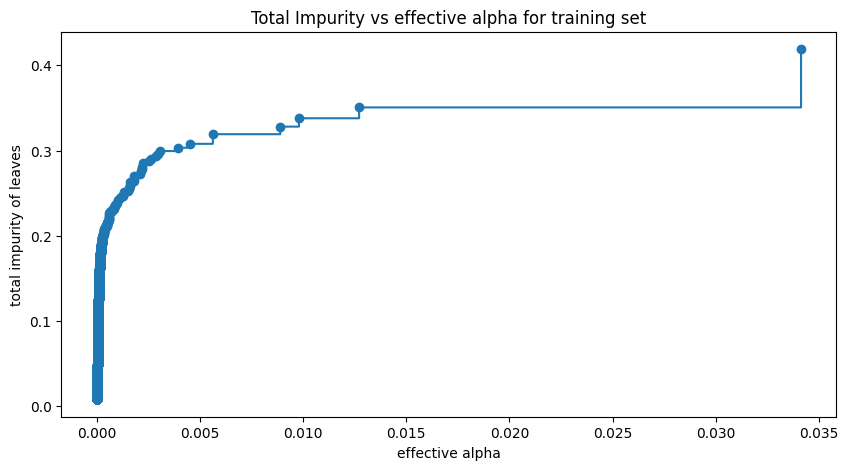

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

In [114]:
#limiting the number of alphas to 25 to optimize processing time
ccp_alphas = ccp_alphas[np.linspace(0, len(ccp_alphas)-1, 25, dtype=int)]
# train decision tree using effective alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight='balanced'
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


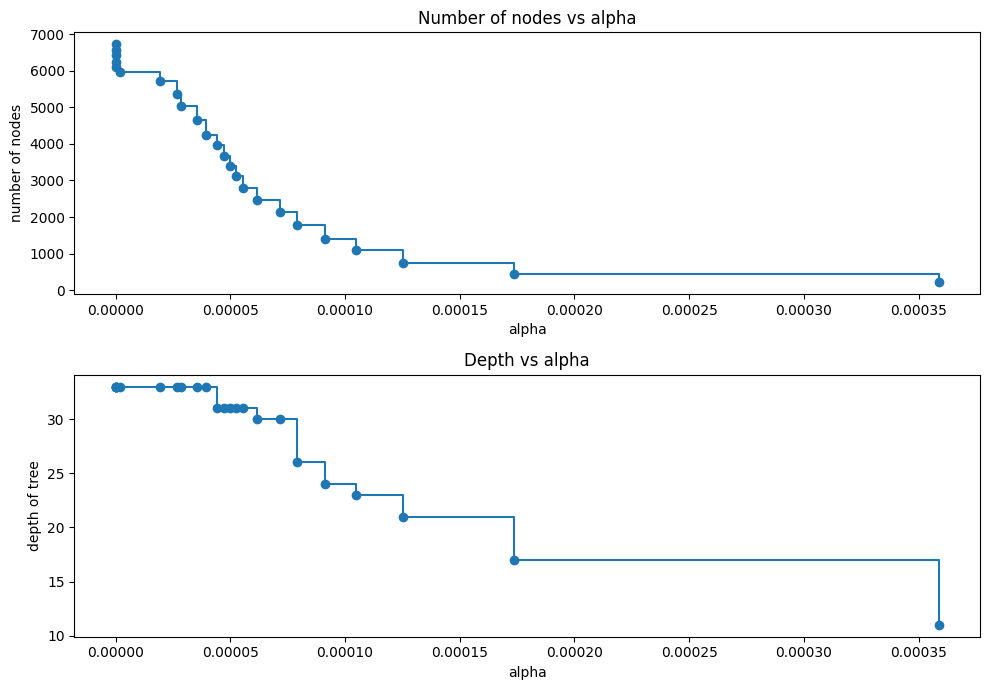

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [116]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

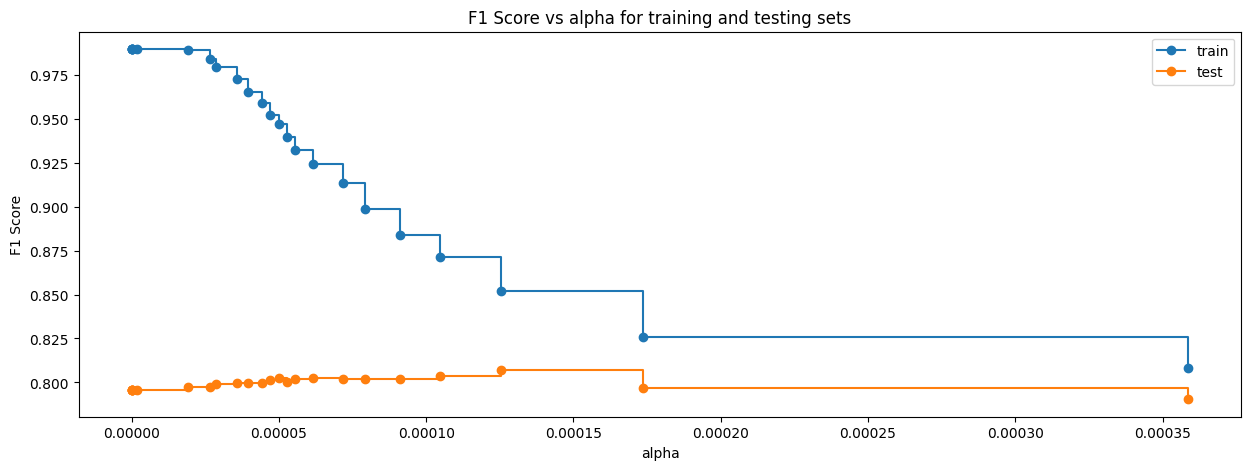

In [117]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('alpha')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs alpha for training and testing sets')
ax.plot(ccp_alphas, f1_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, f1_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [118]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.000125417175249256),
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

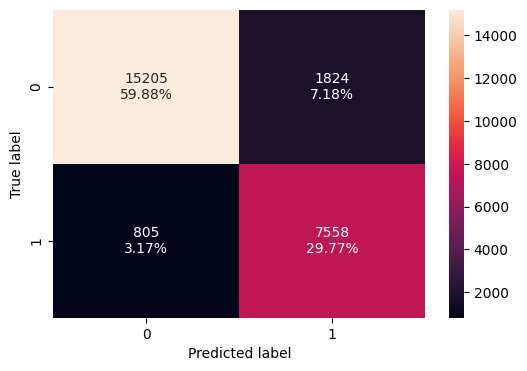

In [119]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [120]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89646 0.90374    0.80559 0.85185

#### Checking performance on testing set

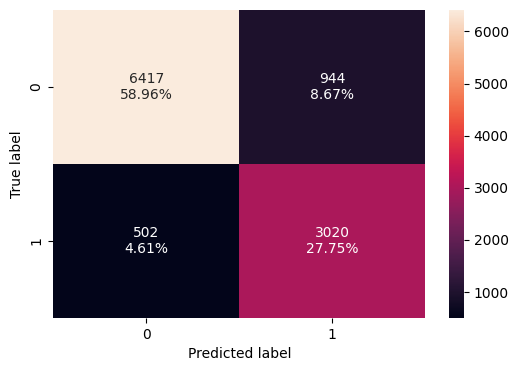

In [121]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [122]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86713 0.85747    0.76186 0.80684

***Observation:***

- Post-pruning has improved the model’s ability to generalize, resulting in more consistent performance across both training and test sets.
- Though the model maintains strong recall, the widening gap between recall and precision indicates reduced accuracy in predicting true cancellations

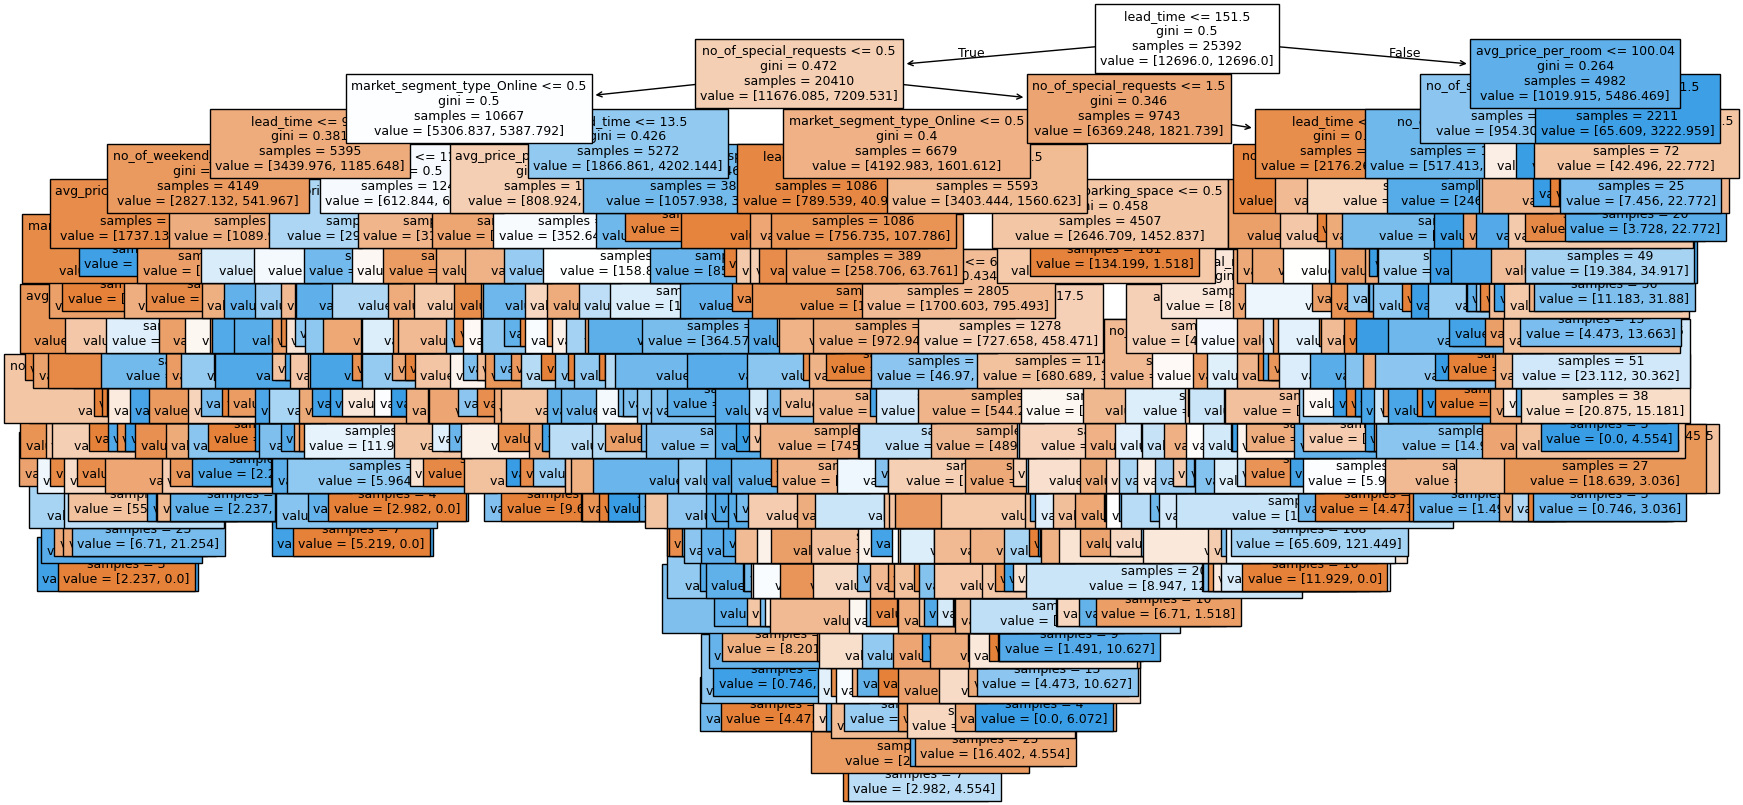

In [123]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [124]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

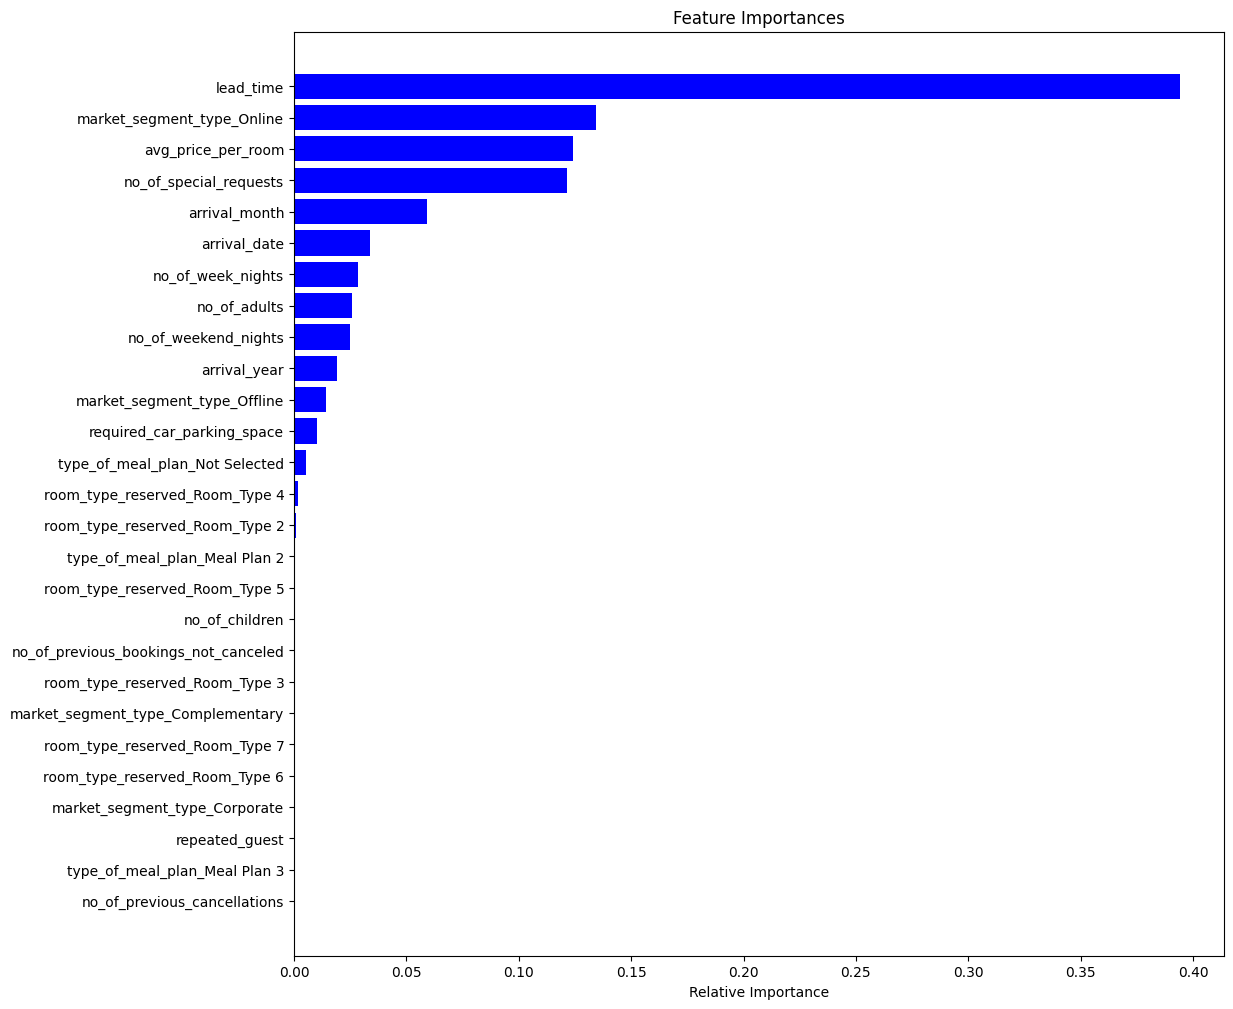

In [125]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***Observations:***

 - We observe the feature importance is same as pre-pruned tree, also the tree is complex compared to pre-pruned tree.

## Model Performance Comparison and Conclusions

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    'Decision Tree sklearn',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)',
]
print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89646  
Recall                          0.90374  
Precision                       0.80559  
F1                              0.85185

In [127]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    'Decision Tree sklearn',
    'Decision Tree (Pre-Pruning)',
    'Decision Tree (Post-Pruning)',
]
print('Test set performance comparison:')
models_test_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87118                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79461                      0.72758   
F1                       0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86713  
Recall                          0.85747  
Precision                       0.76186  
F1                              0.80684

***Observation:***

- With default parameters, the decision tree fits the training set excessively well but lacks the ability to perform reliably on test data, indicating overfitting.
- The pre-pruned decision tree shows strong generalization, achieving a balance between precision and recall.
- The post-pruned decision tree achieves a higher F1 score compared to other models, but exhibits a noticeable imbalance between precision and recall.
- The pre-pruning model supports a strategic balance,by adopting the model  hotel can maintain balance on resources without compromising brand standards.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

****Insights:****

 - Among the models evaluated, the Decision Tree model offers the better predictive performance for the dataset.
 - We see the Lead Time, Number of Special Requests, and Average Daily Rate are significant features across both the Logistic Regression (based on p-values) and the Decision Tree (based on feature importance).
 -  The Logistic Regression model also shows that Lead Time and Average Daily Rate are positively associated with cancellations, whereas the Number of Special Requests shows a negative association.
 - EDA and model prediction reveal bookings tied to lower-priced rooms, shorter lead times, parking requirements, repeat guests, high special request counts, and the Corporate or Offline segments are less prone to cancellation. In contrast, guests reserving higher-priced rooms with longer lead times through the Online segment demonstrate a higher likelihood of canceling.

***What profitable policies for cancellations and refunds can the hotel adopt?***

 - Insights from both the logistic regression coefficients and the decision tree feature importance suggest that INN Hotels should consider differentiating cancellation and refund policies for business and leisure travelers.
 - Model insights indicate that implementing a tailored rewards program for business travelers—characterized by frequent, last-minute bookings via corporate channels and adherence to budget-conscious policies—could incentivize sustained engagement and reduce cancellation rates at INN Hotels.
 - In scenarios of high occupancy or overbooking, model predictions can be leveraged to prioritize room availability for repeat guests and business travelers. At the same time, integrating outputs from both models enables management to flag bookings with a high cancellation likelihood and proactively reassign those rooms to guests with the lowest predicted risk of cancellation within the same category.

***What other recommedations would you suggest to the hotel?***

 - To enhance model effectiveness, the hotel can assign approximate cost values to true and false positive/negative outcomes. This enables optimization for maximum expected profit, rather than strictly for F1 score—our chosen metric based on the client’s current priorities.